# **1. Introduction**
Sebagai perusahaan yang mengatur dan mengawasi layanan transportasi taksi di New York City, NYC TLC (Taxi and Limousine Commission) berkomitmen untuk memastikan bahwa layanan yang disediakan adalah efisien, aman, dan memenuhi kebutuhan warga kota serta pengunjung. Dataset NYC TLC Trip Record, yang mencakup informasi rinci tentang perjalanan taksi, menjadi alat penting dalam usaha kami untuk mengawasi dan meningkatkan kualitas layanan ini.

Dalam analisis ini, kami akan menyelidiki dataset tersebut untuk mengidentifikasi tren dalam permintaan perjalanan, preferensi pelanggan, dan faktor-faktor yang mempengaruhi pemberian tip. Tujuan kami adalah untuk memahami dinamika pasar saat ini, serta mengevaluasi bagaimana kebijakan dan praktik kami dapat disesuaikan untuk meningkatkan kepuasan pelanggan dan efisiensi operasional.

Dataset Taxi Zones Lookup juga akan digunakan untuk memperdalam pemahaman kami tentang bagaimana perjalanan taksi terdistribusi di berbagai zona kota. Ini akan membantu kami dalam merencanakan alokasi sumber daya dan strategi penempatan armada yang lebih baik.

Dengan fokus pada data yang tercatat pada Januari 2023, kami bertujuan untuk mendapatkan wawasan yang dapat membantu kami dalam membuat keputusan yang lebih informasi dan strategis, sehingga dapat terus meningkatkan layanan taksi di New York City dan menjaga kepercayaan publik terhadap sistem transportasi kami.

# 2. **Business Understanding**
Dalam rangka meningkatkan layanan taksi di New York City, analisis yang komprehensif terhadap dataset NYC TLC menjadi krusial. Berikut adalah poin-poin utama yang akan menjadi fokus dalam analisis ini:

1. **Permintaan Perjalanan Berdasarkan Waktu**:
   - Mengidentifikasi pola permintaan perjalanan di berbagai waktu untuk mengoptimalkan penjadwalan dan penempatan armada.

2. **Permintaan Perjalanan Berdasarkan Lokasi Penjemputan dan Pengantaran (Pickup and Drop-off Borough and Zone)**:
   - Analisis lokasi penjemputan dan pengantaran untuk menentukan area dengan permintaan tinggi, memungkinkan alokasi sumber daya yang lebih efektif.

3. **Preferensi Pengguna**:
   - Memahami preferensi pengguna melalui analisis RatecodeID, jenis pembayaran, dan tipe perjalanan, untuk menawarkan layanan yang lebih sesuai dengan kebutuhan dan keinginan pelanggan.

4. **Karakteristik Perjalanan Berdasarkan Jarak, Durasi, dan Kecepatan Mengemudi**:
   - Menganalisis hubungan antara jarak, durasi, dan kecepatan mengemudi untuk menilai efisiensi rute dan pengaruhnya terhadap kepuasan pelanggan.

5. **Distribusi Jumlah Tarif**:
   - Evaluasi distribusi tarif di antara berbagai jenis perjalanan untuk mengidentifikasi kebutuhan penyesuaian tarif.

6. **Korelasi dan Signifikansi Jumlah Tip terhadap Fitur Lain**:
   - Mengkaji bagaimana tip berkorelasi dengan faktor-faktor seperti durasi perjalanan, tarif, dan kecepatan mengemudi, serta signifikansi statistik dari korelasi tersebut untuk mengembangkan strategi yang dapat meningkatkan pemberian tip.

Dengan memahami dan menganalisis aspek-aspek ini, NYC TLC dapat mengembangkan strategi yang lebih efektif untuk mengelola dan meningkatkan layanan taksi, memastikan bahwa kebutuhan pelanggan terpenuhi sambil menjaga keberlanjutan operasional bisnis.

# **2. Data Preparation**

Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

## **2.1 Background Data**

Dataset "NYC TLC Trip Record" memiliki struktur sebagai berikut:
- Jumlah baris: 68,211
- Jumlah kolom: 20
- Kolom-kolom:
1. `VendorID`: Kode ID yang menunjukkan vendor taksi.
  
  1 = Creative Mobile Technologies, LLC

  2 = VeriFone Inc.
2. `lpep_pickup_datetime` & `lpep_dropoff_datetime`: Tanggal dan waktu saat perjalanan mulai dan selesai.
3. `store_and_fwd_flag`: Indikator apakah data ditahan di memori sebelum dikirim ke vendor. Y berarti "simpan dan lanjutkan", N berarti bukan perjalanan "simpan dan lanjutkan"
4. `RatecodeID`: Kode tarif perjalanan.

  1 = Tarif Standar.

  2 = JFK

  3 = Newark

  4 = Nassau atau Westchester

  5 = Tarif yang dinegosiasikan

  6 = Perjalanan kelompok.
5. `PULocationID` & `DOLocationID`: ID Lokasi penjemputan dan penurunan, yang sesuai dengan zona taksi di mana meteran (taximeter) diaktifkan.
6. `passenger_count`: Jumlah penumpang di dalam kendaraan.
7. `trip_distance`: Jarak perjalanan (dalam mil).
8. `fare_amount`: Tarif perjalanan berdasarkan waktu dan jarak.
9. `extra`: Biaya tambahan. Saat ini, hanya mencakup biaya tambahan 0.5 dolar dan 1 dolar untuk jam sibuk dan larut malam.
10. `mta_tax`: Pajak MTA ($0.50) yang otomatis aktif berdasarkan tarif yang diukur digunakan.

11. `tip_amount`: Tips untuk pengemudi (hanya non-tunai). Bidang ini otomatis diisi untuk tip kartu kredit.
12. `tolls_amount`: Biaya tol selama perjalanan.
13. `ehail_fee`: Biaya tambahan sebesar 1 dolar yang otomatis dikenakan untuk setiap perjalanan yang dipesan melalui platform ehail.
14. `improvement_surcharge`: Biaya tambahan sebesar 0.30 dolar yang dinilai pada awal perjalanan. Biaya tambahan ini mulai dikenakan pada tahun 2015.
15. `total_amount`: Jumlah total yang dikenakan kepada penumpang. Bidang ini mencakup tarif yang diukur, biaya tambahan, mta_tax, tip_amount, dan tolls_amount ditambah biaya tambahan ehail atau improvement_surcharge.
16. `payment_type`: Kode numerik yang menunjukkan metode pembayaran.
17. `trip_type`: Kode yang menunjukkan apakah perjalanan adalah dari sisi jalan atau dari pengiriman yang otomatis ditetapkan berdasarkan tarif yang diukur yang digunakan tetapi dapat diubah oleh pengemudi. (1=Street-Hail, 2=Dispatch).
18. `congestion_surcharge`: Biaya kemacetan sebesar 2,75 dolar untuk perjalanan dengan taksi kuning dan hijau di Manhattan selatan dari 96th St. Biaya tambahan ini mulai dikenakan pada tahun 2019..

## **Load Libraries**


In [ ]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
color = sns.color_palette("tab10")

## **Load Dataset**

Berikut 5 baris teratas dan terbawah dari dataset NYC TLC Trip Record dan taxi_zone_lookup

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_trip = pd.read_csv('NYC TLC Trip Record.csv')
display(df_trip.head())
display(df_trip.tail())

df_zone = pd.read_csv('taxi_zone_lookup.csv')
df_zone.fillna('Unknown', inplace=True)
display(df_zone.head())
display(df_zone.tail())

FileNotFoundError: [Errno 2] No such file or directory: 'NYC TLC Trip Record.csv'

In [ ]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [ ]:
df_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          265 non-null    object
 3   service_zone  265 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [ ]:
df = pd.merge(df_trip, df_zone.add_prefix('PU'), left_on='PULocationID', right_on='PULocationID', how='left')
df = pd.merge(df, df_zone.add_prefix('DO'), left_on='DOLocationID', right_on='DOLocationID', how='left')
print('Total data: ', len(df))
df.head()

Total data:  68211


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


## **Skimming Data**

In [ ]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,lpep_pickup_datetime,object,0.000,0.000,0.000,3,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
1,lpep_dropoff_datetime,object,0.000,0.000,0.000,3,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
2,RatecodeID,float64,6.339,0.000,0.000,3,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
3,PULocationID,int64,0.000,0.000,0.000,3,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
4,DOLocationID,int64,0.000,0.000,0.000,3,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
5,passenger_count,float64,6.339,0.000,0.493,3,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
6,trip_distance,float64,0.000,0.000,4.911,3,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
7,fare_amount,float64,0.000,0.258,0.122,3,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."
8,tip_amount,float64,0.000,0.013,42.251,3,1492,"[4.03, 2.64, 1.94, 1.7, 0.0, 4.85, 1.0, 3.0, 3..."
9,payment_type,float64,6.339,0.000,0.000,3,5,"[1.0, 2.0, 3.0, 4.0, 5.0, nan]"


## **2.1. Data Understanding**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset

In [ ]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
df.info()

Jumlah baris: 68211
Jumlah kolom: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   68211 non-null  object 
 1   lpep_dropoff_datetime  68211 non-null  object 
 2   RatecodeID             63887 non-null  float64
 3   PULocationID           68211 non-null  int64  
 4   DOLocationID           68211 non-null  int64  
 5   passenger_count        63887 non-null  float64
 6   trip_distance          68211 non-null  float64
 7   fare_amount            68211 non-null  float64
 8   tip_amount             68211 non-null  float64
 9   payment_type           63887 non-null  float64
 10  trip_type              63877 non-null  float64
 11  PUBorough              68211 non-null  object 
 12  PUZone                 68211 non-null  object 
 13  DOBorough              68211 non-null  object 
 14  DOZone           

In [ ]:
# change dtype lpep_pickup_datetime and lpep_dropoff_datetime into datetime dtype
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 2   RatecodeID             63887 non-null  float64       
 3   PULocationID           68211 non-null  int64         
 4   DOLocationID           68211 non-null  int64         
 5   passenger_count        63887 non-null  float64       
 6   trip_distance          68211 non-null  float64       
 7   fare_amount            68211 non-null  float64       
 8   tip_amount             68211 non-null  float64       
 9   payment_type           63887 non-null  float64       
 10  trip_type              63877 non-null  float64       
 11  PUBorough              68211 non-null  object        
 12  PUZone                 68211 non-null  object        
 13  D

In [ ]:
df.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
count,68211,68211,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000
mean,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,2.139012,1.373613,1.021933
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-10.500000,1.000000,1.000000
25%,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,1.000000,1.000000
50%,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,1.600000,1.000000,1.000000
75%,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,3.330000,2.000000,1.000000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,222.220000,5.000000,2.000000
std,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,3.052710,0.508039,0.146465


In [ ]:
df.describe(include='object')

,PUBorough,PUZone,DOBorough,DOZone
count,68211,68211,68211,68211
unique,7,225,7,248
top,Manhattan,East Harlem North,Manhattan,East Harlem South
freq,39436,13257,39617,3524


In [ ]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
1,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2023-01-01 01:49:28, 20

In [ ]:
# Cek total passenger_count

print(f"Total passenger count: {df['passenger_count'].sum()}")

Total passenger count: 84067.0


In [ ]:
df.isna().sum()

,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
RatecodeID,4324
PULocationID,0
DOLocationID,0
passenger_count,4324
trip_distance,0
fare_amount,0
tip_amount,0
payment_type,4324


## **Missing Value Distribution**

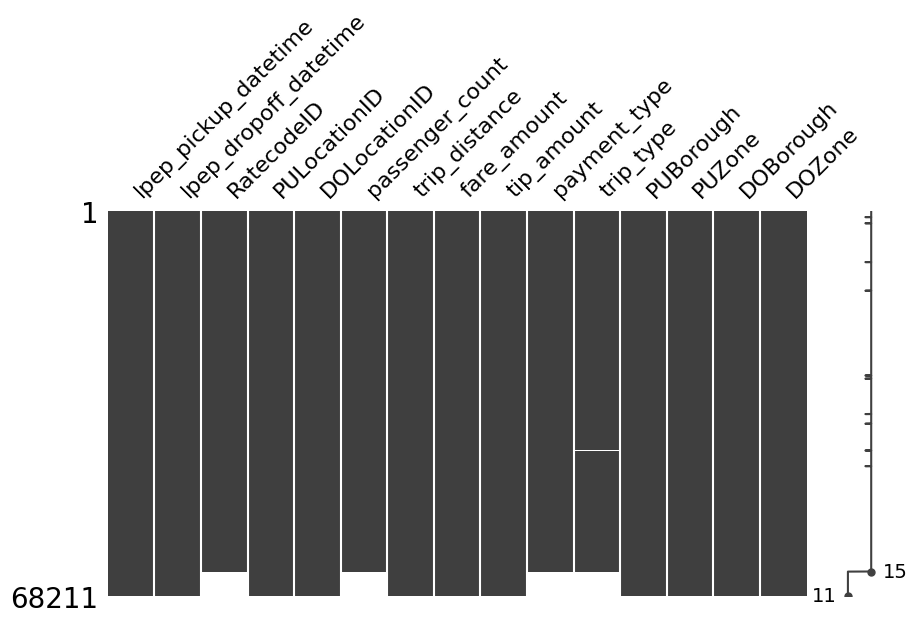

In [ ]:
msno.matrix(df,figsize=(10,5))
plt.show()

Berdasarkan matriks di atas, kita bisa menarik kesimpulan bahwa missing value terdapat pada posisi baris yang sama selain kolom ehail fee.

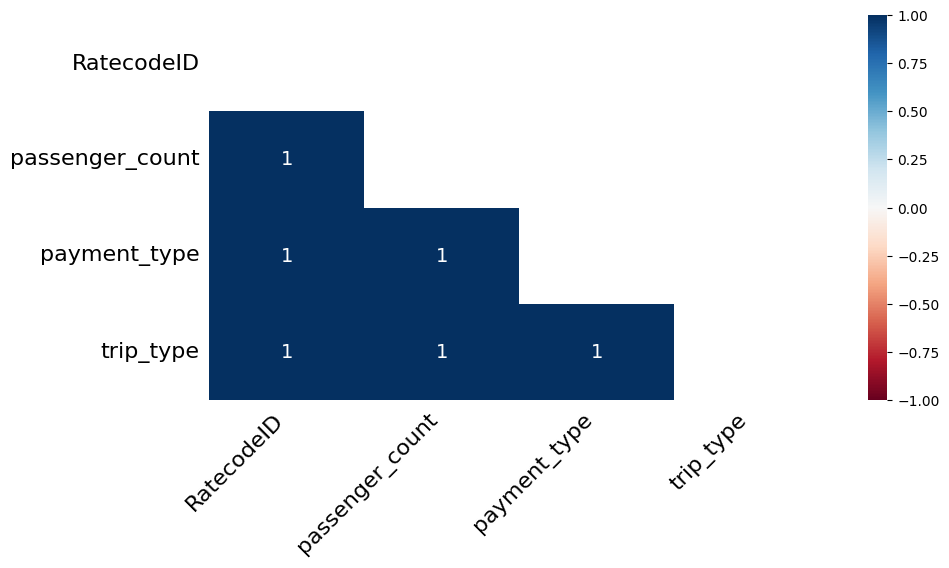

In [ ]:
msno.heatmap(df,figsize=(10,5))
plt.show()

Berdasarkan heatmap di atas, relasi missing value yang bernilai satu yang berarti ketia suatu kolom terdapat baris data missing value maka pada baris di kolom lainnya juga terjadi missing value.

In [ ]:
# cek df isunique
df.nunique()

,0
lpep_pickup_datetime,66575
lpep_dropoff_datetime,66519
RatecodeID,6
PULocationID,226
DOLocationID,249
passenger_count,10
trip_distance,1870
fare_amount,2553
tip_amount,1492
payment_type,5


In [ ]:
# cek apakah value data pada kolom fare_amount ada yang negatif
df[df['fare_amount'] < 0]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.00,0.00,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.00,0.00,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.60,0.00,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
1686,2023-01-02 12:56:53,2023-01-02 13:00:10,1.0,75,75,1.0,0.77,-4.50,0.00,4.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
1864,2023-01-02 13:51:33,2023-01-02 13:52:42,1.0,75,75,2.0,0.08,-3.70,0.00,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64376,2023-01-04 15:11:00,2023-01-04 15:12:00,NaN,25,25,NaN,0.13,-27.96,3.00,NaN,NaN,Brooklyn,Boerum Hill,Brooklyn,Boerum Hill
64487,2023-01-05 10:51:00,2023-01-05 11:20:00,NaN,116,151,NaN,2.22,-43.54,0.76,NaN,NaN,Manhattan,Hamilton Heights,Manhattan,Manhattan Valley
65108,2023-01-10 10:00:00,2023-01-10 10:26:00,NaN,168,159,NaN,3.45,-17.38,0.26,NaN,NaN,Bronx,Mott Haven/Port Morris,Bronx,Melrose South
66459,2023-01-19 17:48:00,2023-01-19 17:52:00,NaN,166,166,NaN,0.38,-35.01,4.86,NaN,NaN,Manhattan,Morningside Heights,Manhattan,Morningside Heights


In [ ]:
# cek value data pada kolom passenger_count apakah ada nilai 0
df[df['passenger_count'] == 0]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
99,2023-01-01 01:27:36,2023-01-01 01:27:43,5.0,168,168,0.0,0.0,20.0,0.0,1.0,2.0,Bronx,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris
254,2023-01-01 04:21:35,2023-01-01 04:30:00,1.0,129,129,0.0,1.3,8.0,2.8,1.0,1.0,Queens,Jackson Heights,Queens,Jackson Heights
446,2023-01-01 11:42:13,2023-01-01 11:49:21,1.0,260,260,0.0,1.2,8.6,2.0,1.0,1.0,Queens,Woodside,Queens,Woodside
486,2023-01-01 12:11:05,2023-01-01 12:20:45,1.0,42,127,0.0,3.4,16.3,1.0,1.0,1.0,Manhattan,Central Harlem North,Manhattan,Inwood
487,2023-01-01 12:56:11,2023-01-01 13:01:06,1.0,75,236,0.0,1.2,7.2,3.4,1.0,1.0,Manhattan,East Harlem South,Manhattan,Upper East Side North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63239,2023-01-31 18:27:02,2023-01-31 18:27:08,1.0,145,145,0.0,0.0,3.0,0.0,2.0,1.0,Queens,Long Island City/Hunters Point,Queens,Long Island City/Hunters Point
63247,2023-01-31 18:01:21,2023-01-31 18:09:22,1.0,236,236,0.0,1.0,9.3,3.2,1.0,1.0,Manhattan,Upper East Side North,Manhattan,Upper East Side North
63288,2023-01-31 18:07:39,2023-01-31 18:07:55,1.0,260,260,0.0,0.1,3.0,0.0,2.0,1.0,Queens,Woodside,Queens,Woodside
63420,2023-01-31 18:32:09,2023-01-31 18:32:33,1.0,145,145,0.0,0.0,3.0,0.0,3.0,1.0,Queens,Long Island City/Hunters Point,Queens,Long Island City/Hunters Point


In [ ]:
# cek pada kolom trip_distance dengan nilai 0
df[df['trip_distance'] == 0]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.0,7.20,1.94,1.0,1.0,Queens,Steinway,Queens,Old Astoria
58,2023-01-01 00:57:15,2023-01-01 01:00:15,1.0,75,75,1.0,0.0,4.40,1.38,1.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
99,2023-01-01 01:27:36,2023-01-01 01:27:43,5.0,168,168,0.0,0.0,20.00,0.00,1.0,2.0,Bronx,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris
107,2023-01-01 01:11:13,2023-01-01 01:11:36,1.0,7,7,1.0,0.0,3.00,9.00,1.0,1.0,Queens,Astoria,Queens,Astoria
115,2023-01-01 01:52:58,2023-01-01 01:53:00,1.0,264,264,1.0,0.0,3.00,21.50,1.0,1.0,Unknown,NV,Unknown,NV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68014,2023-01-30 13:29:00,2023-01-30 14:15:00,NaN,14,75,NaN,0.0,51.12,1.17,NaN,NaN,Brooklyn,Bay Ridge,Manhattan,East Harlem South
68112,2023-01-31 08:36:00,2023-01-31 08:51:00,NaN,41,75,NaN,0.0,15.56,0.00,NaN,NaN,Manhattan,Central Harlem,Manhattan,East Harlem South
68136,2023-01-31 11:10:20,2023-01-31 11:45:20,NaN,42,132,NaN,0.0,70.50,10.80,NaN,NaN,Manhattan,Central Harlem North,Queens,JFK Airport
68161,2023-01-31 13:53:00,2023-01-31 14:17:00,NaN,7,145,NaN,0.0,23.43,4.89,NaN,NaN,Queens,Astoria,Queens,Long Island City/Hunters Point


In [ ]:
# tampilkan jumlah data unique dari kolom RatecodeID
df['RatecodeID'].nunique()

6

## **Exploratory Data Analysis**

### **Data Distribution**

In [ ]:
df.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type
count,68211,68211,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000
mean,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,2.139012,1.373613,1.021933
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-10.500000,1.000000,1.000000
25%,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,1.000000,1.000000
50%,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,1.600000,1.000000,1.000000
75%,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,3.330000,2.000000,1.000000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,222.220000,5.000000,2.000000
std,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,3.052710,0.508039,0.146465


In [ ]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount', 'payment_type', 'trip_type', 'PUBorough',
       'PUZone', 'DOBorough', 'DOZone'],
      dtype='object')

In [ ]:
df.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount', 'PUservice_zone', 'DOservice_zone'], axis=1, inplace=True)
print('Total data: ', len(df))
df.head()

KeyError: "['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount', 'PUservice_zone', 'DOservice_zone'] not found in axis"

In [ ]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount', 'payment_type', 'trip_type', 'PUBorough',
       'PUZone', 'DOBorough', 'DOZone'],
      dtype='object')

## **Data Correlation**

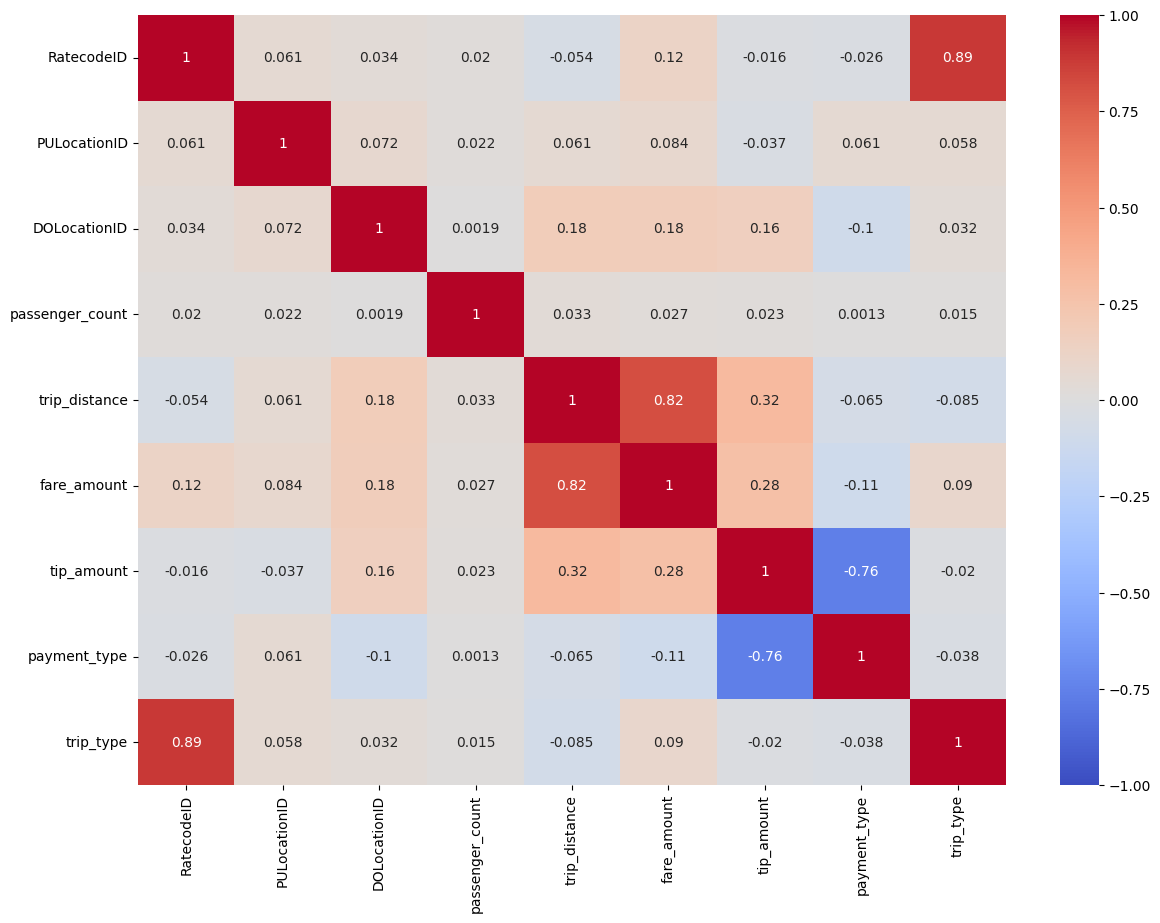

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]

# Calculate correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(numerical_df.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

## **2.2 Data Cleaning**

## **2.2.1 Duplicated Value**

In [ ]:
df[df.duplicated()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
30233,2023-01-16 03:39:38,2023-01-16 03:54:12,1.0,235,78,1.0,2.34,0.0,0.0,2.0,1.0,Bronx,University Heights/Morris Heights,Bronx,East Tremont
30248,2023-01-16 04:11:30,2023-01-16 04:12:44,1.0,78,78,1.0,0.17,0.0,0.0,2.0,1.0,Bronx,East Tremont,Bronx,East Tremont
36901,2023-01-19 13:49:39,2023-01-19 14:40:05,1.0,43,23,1.0,24.14,0.0,0.0,2.0,1.0,Manhattan,Central Park,Staten Island,Bloomfield/Emerson Hill


In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

- Dilihat dari keseluruhan feature record trip, sudah tidak ada data duplicate value. Namun dengan asumsi duplicated value juga dapat ditentukan berdasarkan beberapa fitur diantaranya: lpep_pickup_datetime , lpep_dropoff_datetime , RatecodeID , PULocationID , DOLocationID , passenger_count , trip_distance

- Berdasarkan fitur-fitur tersebut, jika memiliki value yang sama maka dapat ditarik kesimpulan bahwa data tersebut merupakan duplicated value.

In [ ]:
duplicated_value = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
duplicated_value

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
663,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
899,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,0.0,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,2.5,0.0,3.0,1.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63808,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)
63868,2023-01-31 23:44:44,2023-01-31 23:45:15,5.0,264,264,1.0,0.00,-10.0,0.0,4.0,2.0,Unknown,NV,Unknown,NV


Drop value yang negatif

In [ ]:
duplicated_negatif_value = duplicated_value[df['fare_amount'] < 0]
duplicated_negatif_value

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
662,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
898,2023-01-01 17:24:52,2023-01-01 17:25:12,1.0,193,193,1.0,0.00,-3.0,0.0,4.0,1.0,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood
1317,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,-8.6,0.0,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
1686,2023-01-02 12:56:53,2023-01-02 13:00:10,1.0,75,75,1.0,0.77,-4.5,0.0,4.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
1864,2023-01-02 13:51:33,2023-01-02 13:52:42,1.0,75,75,2.0,0.08,-3.7,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2023-01-31 18:39:16,2023-01-31 18:39:29,1.0,130,130,3.0,0.05,-3.0,0.0,4.0,1.0,Queens,Jamaica,Queens,Jamaica
63544,2023-01-31 19:06:18,2023-01-31 19:06:46,1.0,75,75,2.0,0.08,-3.0,0.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
63655,2023-01-31 20:29:00,2023-01-31 20:29:14,1.0,74,74,1.0,0.00,-2.5,0.0,3.0,1.0,Manhattan,East Harlem North,Manhattan,East Harlem North
63807,2023-01-31 22:44:16,2023-01-31 22:45:18,1.0,256,256,1.0,0.15,-3.7,0.0,3.0,1.0,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side)


In [ ]:
df.drop(duplicated_negatif_value.index, inplace=True)

In [ ]:
df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


## **Negative Values**

In [ ]:
pd.DataFrame({
    'feature': df.columns.values,
    'neg_value(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

,feature,neg_value(%)
0,lpep_pickup_datetime,0.000
1,lpep_dropoff_datetime,0.000
2,RatecodeID,0.000
3,PULocationID,0.000
4,DOLocationID,0.000
5,passenger_count,0.000
6,trip_distance,0.000
7,fare_amount,0.007
8,tip_amount,0.000
9,payment_type,0.000


Masih ada sedikit nilai negatif pada fitur fare_amount, maka yang perlu dilakukan adalah fitur tersebut kita absolutkan nilainya agar bernilai positif

In [ ]:
negative_value = df[df['fare_amount'] < 0]
df.loc[negative_value.index, 'fare_amount'] = df['fare_amount'].abs()

## **Zero Values**

In [ ]:
pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    '0_value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if np.issubdtype(df[col].dtype, np.number) else 0 for col in df.columns]
}).round(3)

,feature,data_type,0_value(%)
0,lpep_pickup_datetime,datetime64[ns],0.000
1,lpep_dropoff_datetime,datetime64[ns],0.000
2,RatecodeID,float64,0.000
3,PULocationID,int64,0.000
4,DOLocationID,int64,0.000
5,passenger_count,float64,0.494
6,trip_distance,float64,4.822
7,fare_amount,float64,0.118
8,tip_amount,float64,42.117
9,payment_type,float64,0.000


- Ada beberapa fitur yang bernilai zero (0), untuk fitur tip_amount bernilai 0 artinya penumpang tidak memberikan tip
- passenger_count, trip_distance, fare_amount tidak sepantasnya bernilai 0 karena tidak masuk akal
- untuk passenger_count yang bernilai 0, kita dapat isi dengan central_tendency (median)
- Seleksi dan analisis data yang memiliki fare_amount > 0 dan trip_distance > 0

In [ ]:
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())
df = df[df['trip_distance']>0]
df = df[df['fare_amount']>0]

### **2.2.2 Missing Value**

In [ ]:
df.isna().sum()

,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
RatecodeID,4171
PULocationID,0
DOLocationID,0
passenger_count,4171
trip_distance,0
fare_amount,0
tip_amount,0
payment_type,4171


In [ ]:
# persentase missing value di tiap kolom
missing_value = df.isna().sum() / df.shape[0] * 100
missing_value

,0
lpep_pickup_datetime,0.000000
lpep_dropoff_datetime,0.000000
RatecodeID,6.442694
PULocationID,0.000000
DOLocationID,0.000000
passenger_count,6.442694
trip_distance,0.000000
fare_amount,0.000000
tip_amount,0.000000
payment_type,6.442694


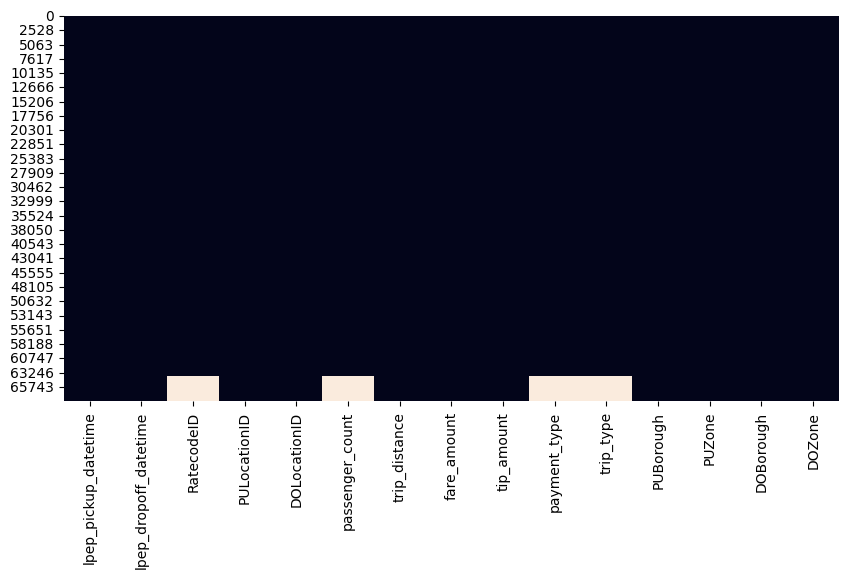

In [ ]:
# sebaran missing value di dalam data
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False)
plt.show()

Secara garis besar:
1. Missing Value
- Missing value terdapat di kolom `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`.
- Proporsi missing value cukup tinggi (>5%) di beberapa kolom:
  - `RatecodeID`, `passenger_count`, `payment_type`, `trip_type` memiliki proporsi value yang sama.

2. Hubungan Missing Value:
- Missing value pada `RatecodeID`, `passenger_count`, `payment_type` dan `trip_type` terlihat berkaitan. Jika satu kolom memiliki missing value, kemungkinan kolom lain juga kosong.

3. Pendekatan Penanganan Missing Value

Ada 2 cara untuk menangani missing value:
- pertama, menghapus baris/kolom yang berisi missing value. Cara ini bisa digunakan untuk menghapus kolom `ehail_fee` karena mutlak berisi data kosong (100%).
- kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi missing value berdasarkan kolom lain yang mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi missing value berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki missing value. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka mean, median, atau modus. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.

Berdasarkan informasi dari website https://www.nyc.gov/site/tlc/passengers/taxi-fare.page

- Tarif di layar adalah `Rate #01 - Standard City Rate"` dalam batas Kota
- Perjalanan antara Manhattan dan Bandara JFK di kedua arah, message fare di layar akan berbunyi `"Rate #02 - JFK Airport"`
- Perjalanan ke Bandara Newark (EWR), message fare di layar berbunyi `"Rate #03 - Newark Airport"`
- Setelah taksi melampaui batas kota NY, ke Nassau atau Westchester, message fare di layar akan berbunyi `"Rate #04 - Out of City Rate to Nassau or Westchester"`
- Titik lain di Luar Kota, message fare di layar akan berbunyi `"Rate #05 - Out of City Negotiated Flat Rate"`

In [ ]:
df['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,59400
5.0,955
2.0,131
4.0,53
3.0,20
99.0,10


In [ ]:
df[df['RatecodeID'] == 4][['PUBorough', 'DOBorough']].value_counts()

,,count
PUBorough,DOBorough,
Queens,Unknown,37
Manhattan,Unknown,7
Bronx,Unknown,2
Manhattan,Manhattan,2
Unknown,Unknown,2
Brooklyn,Unknown,1
Manhattan,EWR,1
Unknown,Queens,1


- Berdasarkan informasi di atas, diketahui bahwa value Unknown tersebut kemungkinan adalah Kota Nassau atau Weschester
- Namun karena analisis ini hanya fokus terhadap kota New York maka data untuk tujuan Nassau atau Weschester akan dihapus
- Sebelum dihapus, ada beberapa kesalahan record harus dihandling pada kolom RatecodeID

In [ ]:
df.loc[(df['RatecodeID']==4) & (df['PUBorough']!='Unknown') & (df['DOBorough']=='EWR'), 'RatecodeID'] = 3
df.loc[(df['RatecodeID']==4) & (df['PUBorough']!='Unknown') & (df['DOBorough']!='Unknown'), 'RatecodeID'] = 1

In [ ]:
df.drop(df[df['PUBorough']=='Unknown'].index, inplace=True)
df.drop(df[df['DOBorough']=='Unknown'].index, inplace=True)

In [ ]:
df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan)
df.loc[(df['PUBorough']=='Manhattan') & (df['DOZone']=='JFK Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['PUZone']=='JFK Airport') & (df['DOBorough']=='Manhattan') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['DOZone']=='Newark Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 3

In [ ]:
df['RatecodeID'].fillna(1, inplace=True)
print(df['RatecodeID'].value_counts())
print('Total NaN values: ', len(df[df['RatecodeID'].isna()]))

RatecodeID
1.0    63327
5.0      878
2.0      170
3.0       16
Name: count, dtype: int64
Total NaN values:  0


In [ ]:
print(df['passenger_count'].value_counts())
print('Total NaN values: ', len(df[df['passenger_count'].isna()]))

passenger_count
1.0    51333
2.0     4870
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: count, dtype: int64
Total NaN values:  4153


In [ ]:
print(df['passenger_count'].median())

1.0


Mengisi missing value pada jumlah penumpang dengan nilai median dari fitur itu sendiri

In [ ]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

print(df['passenger_count'].value_counts())
print('Total NaN values: ', len(df[df['passenger_count'].isna()]))

passenger_count
1.0    55486
2.0     4870
5.0     1746
6.0     1033
3.0      897
4.0      356
7.0        2
8.0        1
Name: count, dtype: int64
Total NaN values:  0


Dari deskripsi dataset, terdapat informasi bahwa tip hanya untuk metode cashless atau kartu kredit akan terisi secara otomatis. Dapat ditarik kesimpulan jika tips > 0 maka metode yang digunakan absolut kartu kredit

Isi sisa missing value dengan opsi unknown yang tersedia

In [ ]:
print(df['payment_type'].value_counts())
print('Total NaN values: ', len(df[df['payment_type'].isna()]))

payment_type
1.0    38278
2.0    21690
3.0      221
4.0       49
Name: count, dtype: int64
Total NaN values:  4153


In [ ]:
df[(df['tip_amount']>0)]['payment_type'].value_counts()

,count
payment_type,
1.0,34706
2.0,1


In [ ]:
df.loc[(df['tip_amount']>0) & (df['payment_type']==2), 'payment_type'] = 1
df[(df['tip_amount']>0)]['payment_type'].value_counts()

,count
payment_type,
1.0,34707


In [ ]:
df.loc[df['payment_type'].isna(), 'payment_type'] = df['tip_amount'].apply(lambda x: 1.0 if x > 0.0 else 5.0)
df['payment_type'].value_counts()

,count
payment_type,
1.0,41994
2.0,21689
5.0,438
3.0,221
4.0,49


Berdasarkan korelasi heatmap saat skimming, fitur trip_type sangat dipengaruhi oleh RatecodeID dengan nilai korelasi sebesar 0.89

In [ ]:
df.groupby(['RatecodeID', 'trip_type']).agg(total=('trip_type', 'count'))

total
RatecodeID trip_type       
1.0        1.0        59205
           2.0            2
2.0        1.0          129
3.0        1.0           15
5.0        1.0          111
           2.0          767

In [ ]:
df[df['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID', 'count'))

,total
RatecodeID,
1.0,4120
2.0,41
3.0,1


In [ ]:
# Calculate the proportion of RatecodeID with respect to trip_type
ratecode_trip_proportion = df.groupby('RatecodeID')['trip_type'].value_counts(normalize=True).unstack()

ratecode_trip_proportion

trip_type,1.0,2.0
RatecodeID,,
1.0,0.999966,0.000034
2.0,1.000000,NaN
3.0,1.000000,NaN
5.0,0.126424,0.873576


- Berdasarkan informasi dari deskripsi dataset, disebutkan bahwa RatecodeID memiliki proporsi 1.99% tipe perjalanan (trip_type) dengan value 1, sedangkan RatecodeID 2 dan 3 semuanya memiliki trip_type 1. Data yang memiliki missing value pada fitur trip_type memiliki value RatecodeID yaitu 1,2 dan 3.
- Isi missing value pada fitur trip_type dengan nilai 1

In [ ]:
df['trip_type'].fillna(1, inplace=True)
df['trip_type'].value_counts()

,count
trip_type,
1.0,63622
2.0,769


In [ ]:
print('Total data:', len(df))
df.head()

Total data: 64391


,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North
5,2023-01-01 00:53:31,2023-01-01 01:11:04,1.0,41,262,1.0,2.78,17.7,0.00,2.0,1.0,Manhattan,Central Harlem,Manhattan,Yorkville East


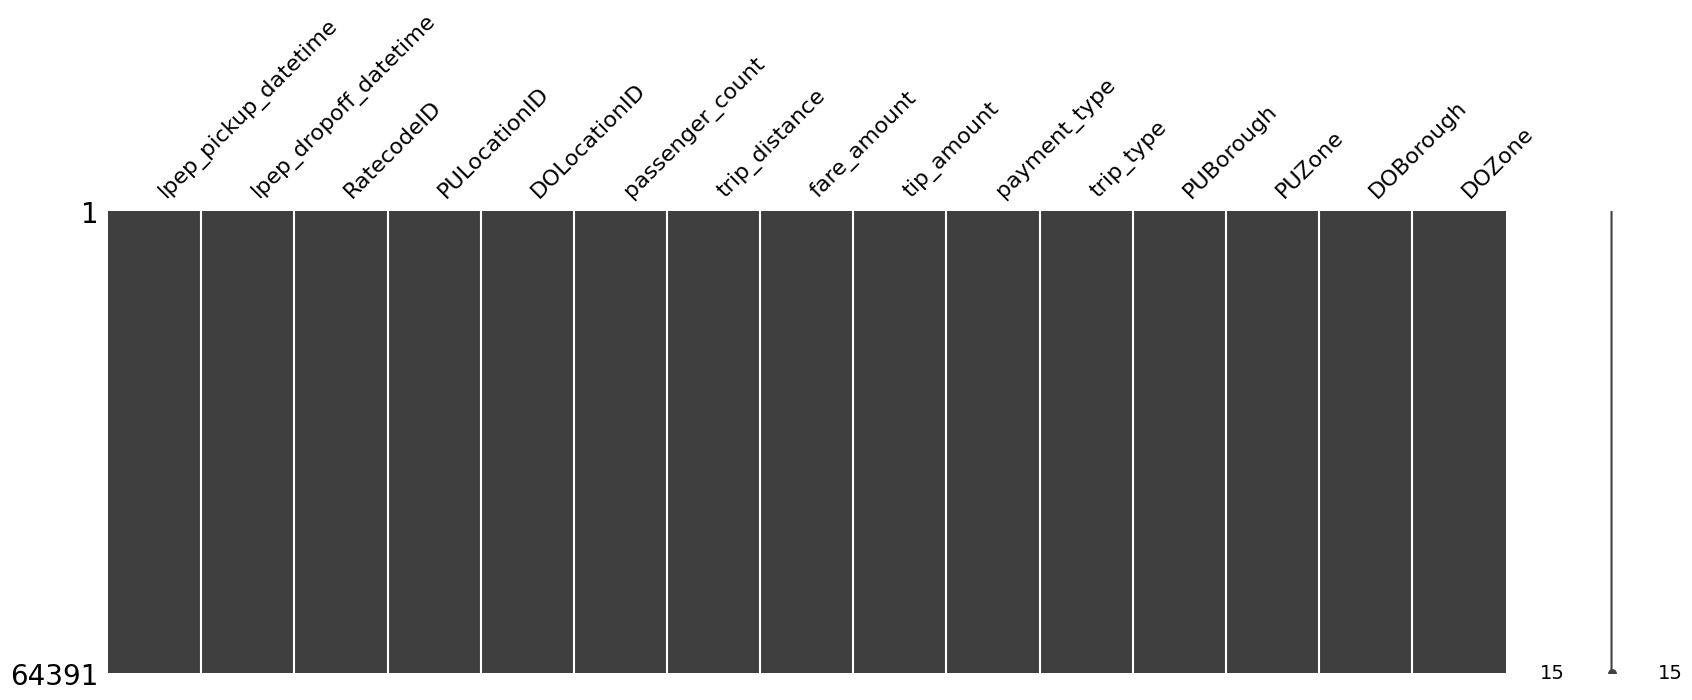

In [ ]:
msno.matrix(df, figsize=(20, 6))
plt.show()

## **Formatting & Outliers Handling**

### **Pick Up and Drop Off Datetime**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64391 entries, 0 to 68210
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   64391 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  64391 non-null  datetime64[ns]
 2   RatecodeID             64391 non-null  float64       
 3   PULocationID           64391 non-null  int64         
 4   DOLocationID           64391 non-null  int64         
 5   passenger_count        64391 non-null  float64       
 6   trip_distance          64391 non-null  float64       
 7   fare_amount            64391 non-null  float64       
 8   tip_amount             64391 non-null  float64       
 9   payment_type           64391 non-null  float64       
 10  trip_type              64391 non-null  float64       
 11  PUBorough              64391 non-null  object        
 12  PUZone                 64391 non-null  object        
 13  DOBoro

In [ ]:
outliers = df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]
outliers

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
298,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.00,2.0,1.0,Queens,Astoria,Queens,Corona
318,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.00,2.0,1.0,Queens,Woodside,Manhattan,Midtown South
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,7.20,1.0,1.0,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,5.66,1.0,2.0,Queens,Elmhurst,Queens,Ridgewood


In [ ]:
df.drop(outliers.index, inplace=True)

In [ ]:
df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


In [ ]:
time_bins = [0, 5, 11, 15, 20, 24]
time_labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']
df['pickup_time'] = pd.cut(df['lpep_pickup_datetime'].dt.hour, bins=time_bins, labels=time_labels, right=False)

df['day_category'] = df['lpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

In [ ]:
df['RatecodeID'] = df['RatecodeID'].replace({1:'Standard rate', 2:'JFK Airport', 3:'Newark Airport', 4:'Nassau or Westchester', 5:'Negotiated fare', 6:'Group ride'})
df['RatecodeID'].value_counts()

,count
RatecodeID,
Standard rate,63324
Negotiated fare,877
JFK Airport,170
Newark Airport,16


In [ ]:
df['passenger_count'].value_counts()

,count
passenger_count,
1.0,55483
2.0,4869
5.0,1746
6.0,1033
3.0,897
4.0,356
7.0,2
8.0,1


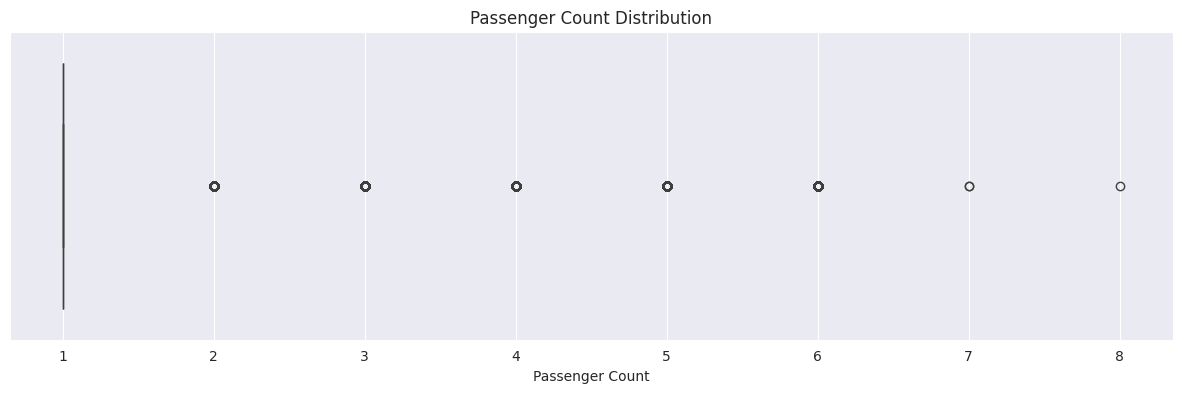

In [ ]:
plt.figure(figsize=(15,4))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='passenger_count', color=color[0])
plt.xlabel('Passenger Count')
plt.title('Passenger Count Distribution')
plt.show()

Mengacu pada peraturan yang disadur dari https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

Jumlah maksimal penumpang yang diperbolehkan dalam taksi adalah 4 sampai 5 penumpang. Kecuali penumpang tambahan harus diterima jika penumpang berusia dibawah tujuh tahun dan digendong di pangkuan penumpang dewasa yang duduk di belakang

In [ ]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: '>3' if x>3 else str(x))
df['passenger_count'].value_counts()

,count
passenger_count,
1.0,55483
2.0,4869
>3,3138
3.0,897


### **Trip Distance**

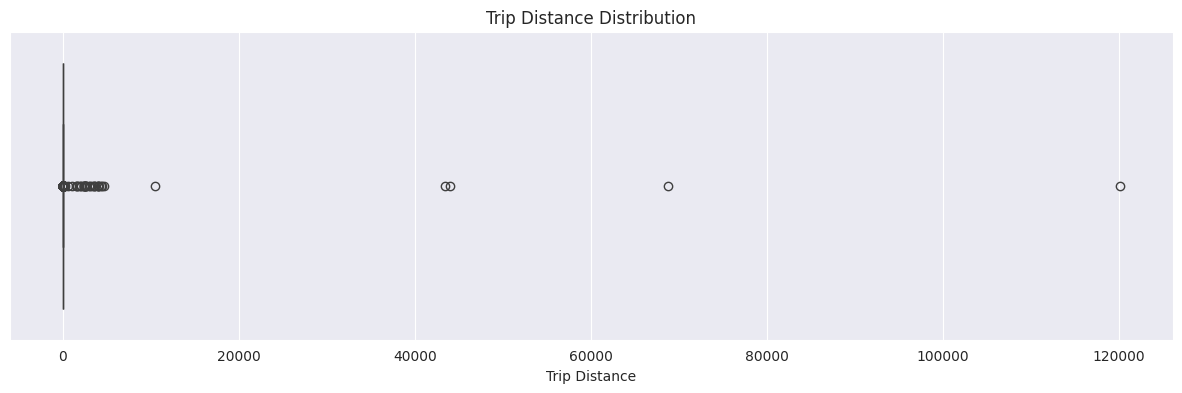

In [ ]:
plt.figure(figsize=(15,4))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='trip_distance', color=color[0])
plt.xlabel('Trip Distance')
plt.title('Trip Distance Distribution')
plt.show()

In [ ]:
df['trip_distance'].describe()

,trip_distance
count,64387.000000
mean,8.538480
std,602.227005
min,0.010000
25%,1.220000
50%,1.930000
75%,3.310000
max,120098.840000


Dengan anggapan bahwa taksi yang menempuh jarak kurang dari 1 km (0,62 miles) merupakan record yang tidak wajar ataupun record yang gagal seperti kemungkinan penumpang atau driver membatalkan pesanan, maka dataset yang memiliki nilai tersebut akan didrop

In [ ]:
print('Banyaknya data yang memiliki jarak kurang dari 1 km (0,62 miles):', len(df[df['trip_distance']<0.62]))
df = df[df['trip_distance']>0.62]

Banyaknya data yang memiliki jarak kurang dari 1 km (0,62 miles): 3465


Terdapat extreme outliers pada data jarak perjalanan taxi

Pertama ubah terlebih dahulu extreme outliers tersebut

In [ ]:
df[df['trip_distance']>50][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount']].sort_values(by='trip_distance', ascending=True)

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount
7322,2023-01-05 09:00:03,2023-01-05 15:18:38,134,134,66.18,15.00
64695,2023-01-06 14:16:00,2023-01-06 14:59:00,82,130,137.95,44.90
66580,2023-01-20 09:16:00,2023-01-20 09:59:00,133,90,254.65,45.44
63995,2023-01-01 12:35:00,2023-01-01 12:58:00,181,137,579.63,28.49
65149,2023-01-10 15:40:00,2023-01-10 16:24:00,26,37,1082.45,49.80
67153,2023-01-24 09:56:00,2023-01-24 10:12:00,41,142,1543.13,19.24
33373,2023-01-17 18:40:38,2023-01-17 19:04:45,82,236,1571.97,29.97
65452,2023-01-12 16:33:00,2023-01-12 17:25:00,189,132,1592.66,67.03
66337,2023-01-19 08:50:00,2023-01-19 09:00:00,74,75,1802.82,13.26
66804,2023-01-21 20:59:00,2023-01-21 21:09:00,7,7,2011.26,12.27


Data extreme outliers terdapat jarak lebih dari 50 miles

In [ ]:
outliers = df[df['trip_distance']>50][['PULocationID', 'DOLocationID', 'trip_distance']]
print('Total outliers:',len(outliers))
outliers.head()

Total outliers: 38


,PULocationID,DOLocationID,trip_distance
7322,134,134,66.18
33373,82,236,1571.97
63995,181,137,579.63
64446,193,140,2555.47
64558,49,65,3077.89


Data extreme outliers tersebut akan diubah dengan nilai median dari trip_distance dengan group by pick off location dan drop off location

In [ ]:
ct_distance_byid = df[df['trip_distance']<50].groupby(['PULocationID', 'DOLocationID']).agg(count=('trip_distance', 'count'),
                                                                                            avg_distance=('trip_distance', 'mean'),
                                                                                            median_distance=('trip_distance', 'median')).reset_index()
ct_distance_byid.sample(7, random_state=3)

,PULocationID,DOLocationID,count,avg_distance,median_distance
4180,220,127,2,8.5950,8.595
1947,80,87,2,6.5800,6.580
4548,244,92,1,13.2200,13.220
4112,212,248,1,0.6600,0.660
737,41,120,4,2.7625,2.775
3833,189,17,2,1.6900,1.690
285,25,24,2,11.2100,11.210


In [ ]:
distance_byid = pd.merge(outliers, ct_distance_byid, on=['PULocationID', 'DOLocationID'], how='left')
distance_byid.drop(columns='count', axis=1, inplace=True)
distance_byid.index = outliers.index
display(distance_byid.head(5))

print('Hasil Inputasi:')
df.loc[outliers.index, 'trip_distance'] = distance_byid['median_distance']
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'trip_distance']].head()

,PULocationID,DOLocationID,trip_distance,avg_distance,median_distance
7322,134,134,66.18,1.129205,0.910
33373,82,236,1571.97,8.023333,8.080
63995,181,137,579.63,7.460000,7.460
64446,193,140,2555.47,2.410000,2.470
64558,49,65,3077.89,1.025000,1.025


Hasil Inputasi:


,PULocationID,DOLocationID,trip_distance
7322,134,134,0.910
33373,82,236,8.080
63995,181,137,7.460
64446,193,140,2.470
64558,49,65,1.025


In [ ]:
df[df.isna().any(axis=1)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,pickup_time,day_category
65149,2023-01-10 15:40:00,2023-01-10 16:24:00,Standard rate,26,37,1.0,NaN,49.80,0.95,1.0,1.0,Brooklyn,Borough Park,Brooklyn,Bushwick South,Evening,Weekdays
65306,2023-01-11 17:03:00,2023-01-11 17:59:00,Standard rate,61,117,1.0,NaN,56.16,0.00,5.0,1.0,Brooklyn,Crown Heights North,Queens,Hammels/Arverne,Evening,Weekdays
65491,2023-01-13 06:44:00,2023-01-13 07:08:00,Standard rate,147,116,1.0,NaN,17.54,0.00,5.0,1.0,Bronx,Longwood,Manhattan,Hamilton Heights,Morning,Weekdays
66344,2023-01-19 09:47:00,2023-01-19 10:14:00,Standard rate,85,36,1.0,NaN,28.30,1.46,1.0,1.0,Brooklyn,Erasmus,Brooklyn,Bushwick North,Morning,Weekdays
66580,2023-01-20 09:16:00,2023-01-20 09:59:00,Standard rate,133,90,1.0,NaN,45.44,0.00,5.0,1.0,Brooklyn,Kensington,Manhattan,Flatiron,Morning,Weekdays
66724,2023-01-21 10:05:00,2023-01-21 10:27:00,Standard rate,74,259,1.0,NaN,40.06,0.00,5.0,1.0,Manhattan,East Harlem North,Bronx,Woodlawn/Wakefield,Morning,Weekend
67307,2023-01-25 11:29:00,2023-01-25 11:40:00,Standard rate,242,208,1.0,NaN,18.48,0.33,1.0,1.0,Bronx,Van Nest/Morris Park,Bronx,Schuylerville/Edgewater Park,Noon,Weekdays


- Terdapat beberapa entry yang tidak memiliki record LocationID yang sama di dataset sehingga akan menyebabkan NaN values
- Untuk mengatasi masalah ini, dapat dilakukan seperti handling sebelumnya, perbedaannya hanya menggunakan median dengan referensi wilayah (Borough) untuk inputasi

In [ ]:
isna = df.loc[df['trip_distance'].isna()][['PUBorough', 'DOBorough','trip_distance']]
isna

,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,NaN
65306,Brooklyn,Queens,NaN
65491,Bronx,Manhattan,NaN
66344,Brooklyn,Brooklyn,NaN
66580,Brooklyn,Manhattan,NaN
66724,Manhattan,Bronx,NaN
67307,Bronx,Bronx,NaN


In [ ]:
ct_distance_byborough = df[df['trip_distance']<70].groupby(['PUBorough', 'DOBorough']).agg(count=('trip_distance', 'count'), avg_distance=('trip_distance', 'mean'), median_distance=('trip_distance', 'median')).reset_index()
ct_distance_byborough.sample(5, random_state=4)

,PUBorough,DOBorough,count,avg_distance,median_distance
20,Staten Island,Brooklyn,1,11.390000,11.39
19,Queens,Queens,14119,2.674917,1.97
0,Bronx,Bronx,519,3.085096,2.52
3,Bronx,Queens,25,12.287600,10.36
6,Brooklyn,EWR,7,15.090000,15.08


In [ ]:
distance_byborough = pd.merge(isna, ct_distance_byborough, on=['PUBorough', 'DOBorough'], how='left')
distance_byborough.index = isna.index
display(distance_byborough)

print('Hasil Inputasi:')
df.loc[isna.index, 'trip_distance'] = distance_byborough['median_distance'].round(2)
display(df.loc[isna.index][['PUBorough', 'DOBorough', 'trip_distance']])

,PUBorough,DOBorough,trip_distance,count,avg_distance,median_distance
65149,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
65306,Brooklyn,Queens,NaN,438,9.387329,9.540
65491,Bronx,Manhattan,NaN,253,4.992470,3.400
66344,Brooklyn,Brooklyn,NaN,6020,2.613547,2.015
66580,Brooklyn,Manhattan,NaN,1586,5.966778,5.635
66724,Manhattan,Bronx,NaN,1430,4.113755,3.290
67307,Bronx,Bronx,NaN,519,3.085096,2.520


Hasil Inputasi:


,PUBorough,DOBorough,trip_distance
65149,Brooklyn,Brooklyn,2.01
65306,Brooklyn,Queens,9.54
65491,Bronx,Manhattan,3.40
66344,Brooklyn,Brooklyn,2.01
66580,Brooklyn,Manhattan,5.64
66724,Manhattan,Bronx,3.29
67307,Bronx,Bronx,2.52


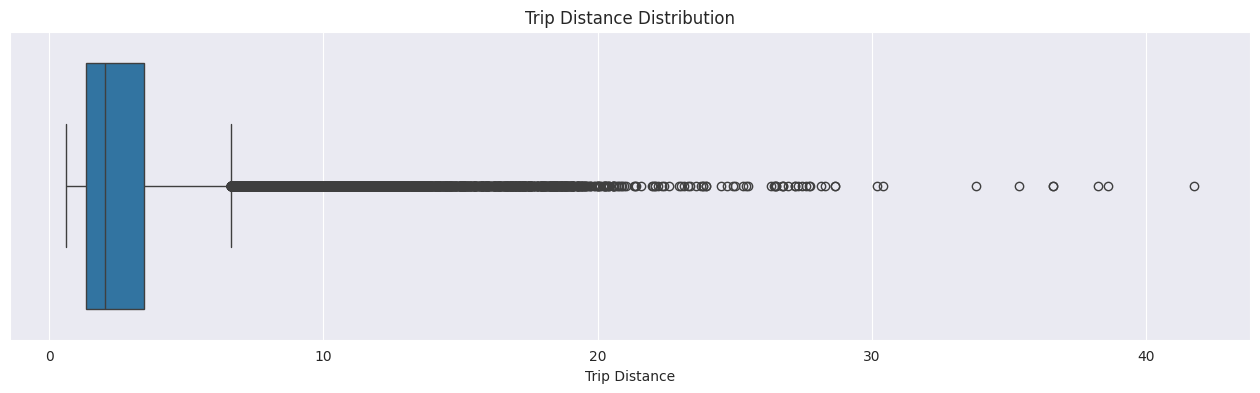

In [ ]:
plt.figure(figsize=(16,4))

sns.boxplot(data=df, x='trip_distance', color=color[0])
plt.xlabel('Trip Distance')
plt.title('Trip Distance Distribution')
plt.show()

Handling normal outliers dengan cara membuat bins

In [ ]:
bins_of_distance = [0,2,6,10,np.inf]
labels_of_distance = ['<2 miles', '3-5 miles', '7-10 miles', '>10 miles']

df['distance_bins'] = pd.cut(df['trip_distance'], bins=bins_of_distance, labels=labels_of_distance)

In [ ]:
df['distance_bins'].value_counts()

,count
distance_bins,
<2 miles,29984
3-5 miles,24711
7-10 miles,4590
>10 miles,1543


## **Feature Creation - Trip Duration**

Membuat kolom baru bernama trip_duration dari kolom lpep_pickup_datetime dan lpep_dropoff_datetime

In [ ]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,pickup_time,day_category,distance_bins,trip_duration
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,143,1.0,2.58,14.9,4.03,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,Midnight,Weekend,3-5 miles,11.016667
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,43,1.0,1.81,10.7,2.64,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park,Midnight,Weekend,<2 miles,6.766667
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,41,238,1.0,1.30,6.5,1.70,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North,Midnight,Weekend,<2 miles,5.816667
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,41,74,1.0,1.10,6.0,0.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North,Midnight,Weekend,<2 miles,5.966667
5,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard rate,41,262,1.0,2.78,17.7,0.00,2.0,1.0,Manhattan,Central Harlem,Manhattan,Yorkville East,Midnight,Weekend,3-5 miles,17.550000


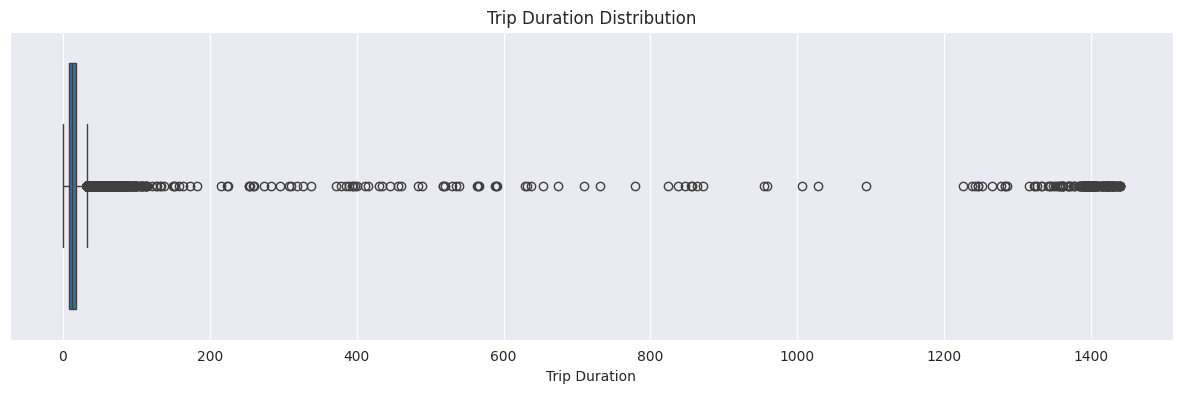

In [ ]:
plt.figure(figsize=(15,4))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='trip_duration', color=color[0])
plt.xlabel('Trip Duration')
plt.title('Trip Duration Distribution')
plt.show()

Perjalanan yang hanya berlangsung 1-2 menit bukanlah hal yang luar biasa. Dengan kemungkinan bahwa taksi yang menempuh jarak kurang dari 2 menit merupakan record yang tidak wajar ataupun record yang gagal seperti kemungkinan penumpang atau driver membatalkan pesanan, maka dataset yang memiliki nilai tersebut akan didrop.

In [ ]:
print('Banyaknya data yang memiliki jarak kurang dari 2 menit:', len(df[df['trip_duration']<=2]))
df = df[df['trip_duration']>2]

Banyaknya data yang memiliki jarak kurang dari 2 menit: 130


- Sama seperti fitur distance sebelumnya, fitur trip_duration juga terdapat extreme outliers
- Pertama ubah dahulu extreme outliers tersebut

In [ ]:
df[df['trip_duration']==df['trip_duration'].max()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,pickup_time,day_category,distance_bins,trip_duration
33850,2023-01-18 06:58:14,2023-01-19 06:57:10,Standard rate,74,41,1.0,1.09,7.9,0.0,1.0,1.0,Manhattan,East Harlem North,Manhattan,Central Harlem,Morning,Weekdays,<2 miles,1438.933333


In [ ]:
df['trip_distance'].max()

41.74

- dari informasi https://otomotif.antaranews.com/berita/4067919/batas-kecepatan-di-jalanan-new-york-akan-diturunkan-jadi-32-km-jam#:~:text=Batas%20kecepatan%20di%20jalanan%20New,32%20km/jam%20%2D%20ANTARA%20News, kecepatan terendah di kota new york yaitu 32 km/jam atau 20 mph maka waktu yang diperlukan yaitu 2.087 jam atau sekitar  125 menit. Maka dapat diasumsikan untuk durasi yang lebih dari 125 menit merupakan trip record extreme outliers (tidak masuk akal).
- sama seperti fitur distance sebelumnya, data extreme outliers akan diubah dengan nilai median dari trip_duration untuk masing-masing titik keberangkatan dan pemberhentian pada record yang sudah ada di dalam dataset

In [ ]:
outliers = df[df['trip_duration']>125][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]
print('Total extreme outliers : ', len(outliers))
outliers.head()

Total extreme outliers :  240


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,1375.466667
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.016667
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.483333
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.016667
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.233333


In [ ]:
ct_duration_byid = df[df['trip_duration']<125].groupby(['PULocationID', 'DOLocationID']).agg(count=('distance_bins', 'count'),
                                                                                                 mean_duration=('trip_duration', 'mean'),
                                                                                                 median_duration=('trip_duration', 'median')).reset_index()
ct_duration_byid.sample(5, random_state=3)

,PULocationID,DOLocationID,count,mean_duration,median_duration
4784,256,85,1,24.166667,24.166667
3786,185,203,1,33.000000,33.000000
4334,227,22,1,21.000000,21.000000
3445,166,186,8,25.254167,26.758333
4168,220,132,1,62.000000,62.000000


In [ ]:
duration_byid = pd.merge(outliers, ct_duration_byid, on=['PULocationID', 'DOLocationID'], how='left')
duration_byid.drop(columns='count', axis=1, inplace=True)
duration_byid.index = outliers.index
display(duration_byid.head())

print('Hasil inputasi:')
df.loc[outliers.index, 'trip_duration'] = duration_byid['median_duration'].round(2)
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,mean_duration,median_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,1375.466667,24.527778,24.583333
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,1326.016667,12.232587,11.883333
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,1383.483333,22.133333,20.350000
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,1371.016667,11.665106,9.200000
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,1408.233333,23.145000,22.441667


Hasil inputasi:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 23:18:32,24.58
108,260,223,2023-01-01 01:53:59,2023-01-02 00:00:00,11.88
118,129,37,2023-01-01 01:25:46,2023-01-02 00:29:15,20.35
207,129,129,2023-01-01 03:12:42,2023-01-02 02:03:43,9.20
262,65,37,2023-01-01 04:03:36,2023-01-02 03:31:50,22.44


In [ ]:
df.isna().sum()

,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
RatecodeID,0
PULocationID,0
DOLocationID,0
passenger_count,0
trip_distance,0
fare_amount,0
tip_amount,0
payment_type,0


- Terdapat missing values yang kemungkinan sama seperti kasus sebelumnya dimana tidak terdapat record yang sama pada PULocationID dan DOLocationID untuk kolom trip_duration
- Missing values kita isi dengan median dengan referensi kolom PUBorough dan DOBorough yang sama

In [ ]:
isna = df.loc[outliers.index][df['trip_duration'].isna()][['PUBorough', 'DOBorough', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]
print('Total NaN Value : ', len(isna))
isna

Total NaN Value :  15


,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
556,Queens,Queens,2023-01-01 13:07:46,2023-01-01 19:45:18,NaN
9055,Brooklyn,Brooklyn,2023-01-05 20:33:45,2023-01-05 22:46:41,NaN
16126,Brooklyn,Brooklyn,2023-01-09 13:44:30,2023-01-10 11:07:20,NaN
25053,Bronx,Queens,2023-01-13 14:23:36,2023-01-13 16:30:12,NaN
29711,Brooklyn,Brooklyn,2023-01-15 17:52:52,2023-01-15 22:11:55,NaN
30240,Queens,Queens,2023-01-16 03:13:50,2023-01-17 00:00:00,NaN
40817,Queens,Manhattan,2023-01-21 03:09:37,2023-01-22 01:46:44,NaN
41975,Queens,Queens,2023-01-21 17:19:27,2023-01-22 00:00:00,NaN
42432,Brooklyn,Brooklyn,2023-01-21 20:29:58,2023-01-22 02:59:25,NaN
44216,Bronx,Bronx,2023-01-22 21:35:25,2023-01-23 20:42:11,NaN


In [ ]:
ct_duration_byborough = df[df['trip_duration']<125].groupby(['PUBorough', 'DOBorough']).agg(count=('distance_bins', 'count'),
                                                                                                 mean_duration=('trip_duration', 'mean'),
                                                                                                 median_duration=('trip_duration', 'median')).reset_index()
ct_duration_byborough.sample(15, random_state=5)

,PUBorough,DOBorough,count,mean_duration,median_duration
18,Queens,Manhattan,902,26.747871,24.775000
2,Bronx,Manhattan,253,20.556192,17.783333
17,Queens,EWR,7,58.354762,55.333333
19,Queens,Queens,14086,13.086872,11.033333
20,Staten Island,Brooklyn,1,36.550000,36.550000
21,Staten Island,Staten Island,7,11.919048,8.800000
10,Manhattan,Bronx,1431,17.177922,15.550000
5,Brooklyn,Brooklyn,6005,16.318585,13.916667
1,Bronx,Brooklyn,6,40.591667,42.000000
13,Manhattan,Manhattan,33758,12.397255,10.800000


In [ ]:
duration_byborough = pd.merge(isna, ct_duration_byborough, on=['PUBorough', 'DOBorough'], how='left')
duration_byborough.drop(columns='count', axis=1, inplace=True)
duration_byborough.index = isna.index
display(duration_byborough.head())

print('Hasil inputasi:')
df.loc[isna.index, 'trip_duration'] = duration_byborough['median_duration'].round(2)
df.loc[isna.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']].head()

,PUBorough,DOBorough,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,mean_duration,median_duration
556,Queens,Queens,2023-01-01 13:07:46,2023-01-01 19:45:18,NaN,13.086872,11.033333
9055,Brooklyn,Brooklyn,2023-01-05 20:33:45,2023-01-05 22:46:41,NaN,16.318585,13.916667
16126,Brooklyn,Brooklyn,2023-01-09 13:44:30,2023-01-10 11:07:20,NaN,16.318585,13.916667
25053,Bronx,Queens,2023-01-13 14:23:36,2023-01-13 16:30:12,NaN,29.618750,24.000000
29711,Brooklyn,Brooklyn,2023-01-15 17:52:52,2023-01-15 22:11:55,NaN,16.318585,13.916667


Hasil inputasi:


,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
556,223,8,2023-01-01 13:07:46,2023-01-01 19:45:18,11.03
9055,14,123,2023-01-05 20:33:45,2023-01-05 22:46:41,13.92
16126,17,256,2023-01-09 13:44:30,2023-01-10 11:07:20,13.92
25053,250,134,2023-01-13 14:23:36,2023-01-13 16:30:12,24.00
29711,150,123,2023-01-15 17:52:52,2023-01-15 22:11:55,13.92


Ketika mengubah time duration maka perlu mengubah juga waktu dropoff untuk semua entry yang telah terdampak oleh extreme outliers di atas

In [ ]:
df.loc[outliers.index, 'lpep_dropoff_datetime'] = df['lpep_pickup_datetime'] + pd.to_timedelta((df['trip_duration']), unit='m').dt.round('S')
df.loc[outliers.index][['PULocationID', 'DOLocationID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration']]

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration
49,255,48,2023-01-01 00:23:04,2023-01-01 00:47:39,24.58
108,260,223,2023-01-01 01:53:59,2023-01-01 02:05:52,11.88
118,129,37,2023-01-01 01:25:46,2023-01-01 01:46:07,20.35
207,129,129,2023-01-01 03:12:42,2023-01-01 03:21:54,9.20
262,65,37,2023-01-01 04:03:36,2023-01-01 04:26:02,22.44
...,...,...,...,...,...
62653,244,43,2023-01-31 13:57:30,2023-01-31 14:17:02,19.54
62762,92,64,2023-01-31 15:21:47,2023-01-31 15:32:49,11.03
63105,43,151,2023-01-31 17:45:46,2023-01-31 17:52:09,6.38
63279,82,82,2023-01-31 18:22:24,2023-01-31 18:32:31,10.12


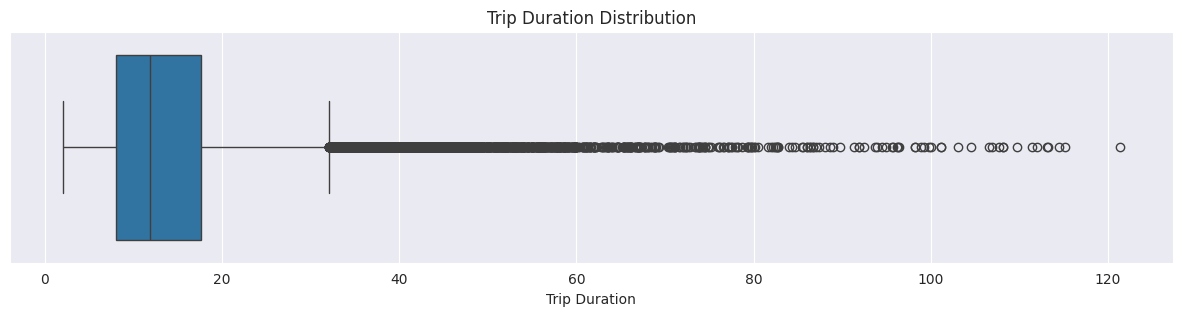

In [ ]:
plt.figure(figsize=(15,3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='trip_duration', color=color[0])
plt.xlabel('Trip Duration')
plt.title('Trip Duration Distribution')
plt.show()

handling normal outliers dengan cara membuat bins

In [ ]:
bins_of_duration = [0, 10, 20, 30, np.inf]
labels_of_duration = ['<10 minutes', '11-20 minutes', '21-30 minutes', '>30 minutes']

df['duration_bins'] = pd.cut(df['trip_duration'], bins=bins_of_duration, labels=labels_of_duration)

In [ ]:
df['duration_bins'].value_counts()

,count
duration_bins,
11-20 minutes,26038
<10 minutes,23327
21-30 minutes,7713
>30 minutes,3620


## **Feature Creation - Driving Speed**

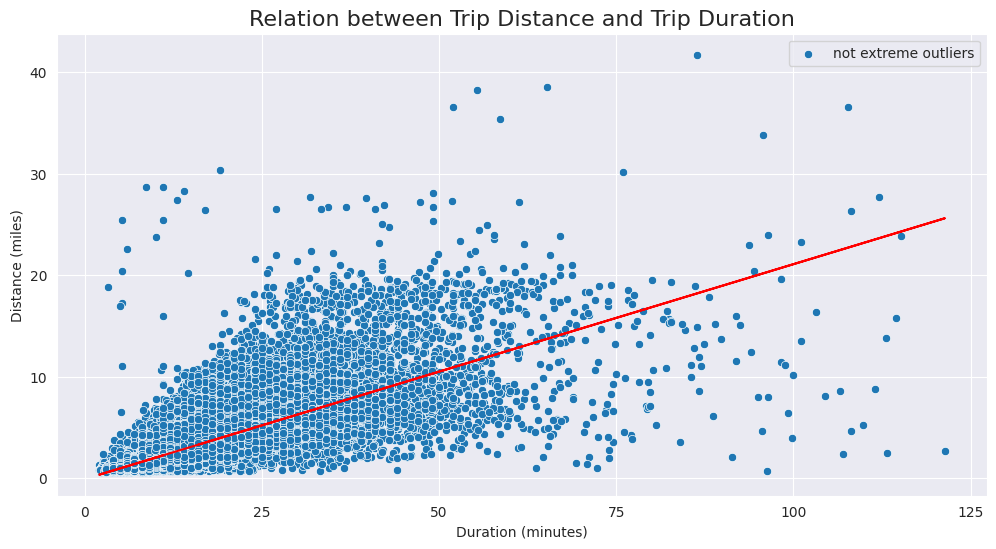

In [ ]:
plt.figure(figsize=(12,6))

sns.scatterplot(df, x='trip_duration', y='trip_distance', color=color[0], label='not extreme outliers')

x, y = df['trip_duration'], df['trip_distance']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 126, 25))
plt.legend(loc ="upper right", prop={'size': 10})
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)
plt.show()

Insight:

- Hubungan antara kolom jarak dan durasi, yang merupakan hubungan linear dimana jika jaraknya semakin jauh maka waktu yang dibutuhkan juga semakin besar
- Dari kedua fitur tersebut dapat menghasilkan kolom baru yaitu kecepatan (jarak/durasi)

In [ ]:
df['speed'] = (df['trip_distance'] / (df['trip_duration']/60)).round(2)

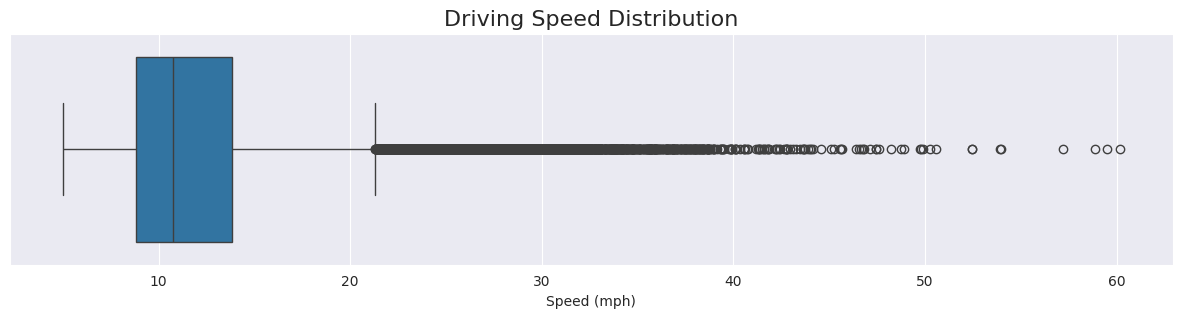

In [ ]:
plt.figure(figsize=(15, 3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='speed', color=color[0])
plt.xlabel('Speed (mph)')
plt.title('Driving Speed Distribution', fontsize=16)

plt.show()

- Berdasarkan boxplot di atas terdapat extreme outliers pada kolom ini seperti kecepatan yang lebih dari 100 mph dan kurang dari 5 mph
- Berdasarkan data dari NYC TLC untuk periode sebelum 2021, kecepatan rata-rata taksi sering kali ditemukan berkisar antara 10 sampai 14 mph
- Namun, kecepatan ini dapat bervariasi tergantung kondisi keramaian lalu lintas, dengan kemungkinan adanya kemacetan maka toleransi kecepatan terendah yaitu kurang lebih dari 5 mph
- Di NY, kecepatan maksimal dalam kota adalah 20 mph sedangkan di jalan raya sekitar 65 mph
- Dengan toleransi 5 mph, maka toleransi kecepatan tertinggi yaitu 70 mph

In [ ]:
outliers = df[(df['speed']<5) | (df['speed']>70)][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'distance_bins', 'trip_duration', 'duration_bins', 'speed']]
print('Total extreme outliers : ', len(outliers))
outliers.sort_values(by='speed', ascending=True).head()

Total extreme outliers :  899


,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_bins,trip_duration,duration_bins,speed
60667,2023-01-30 14:55:13,2023-01-30 16:31:28,0.64,<2 miles,96.250000,>30 minutes,0.40
17029,2023-01-09 19:38:56,2023-01-09 20:51:12,1.03,<2 miles,72.266667,>30 minutes,0.86
48027,2023-01-24 15:48:48,2023-01-24 16:52:24,1.02,<2 miles,63.600000,>30 minutes,0.96
67119,2023-01-24 07:46:00,2023-01-24 08:30:00,0.83,<2 miles,44.000000,>30 minutes,1.13
22863,2023-01-12 14:17:23,2023-01-12 15:28:18,1.41,<2 miles,70.916667,>30 minutes,1.19


Ketika terhubung ke fitur lain maka perlu diperiksa apakah terdapat contextual outliers seperti di bawah ini berdasarkan kecepatan taksi.

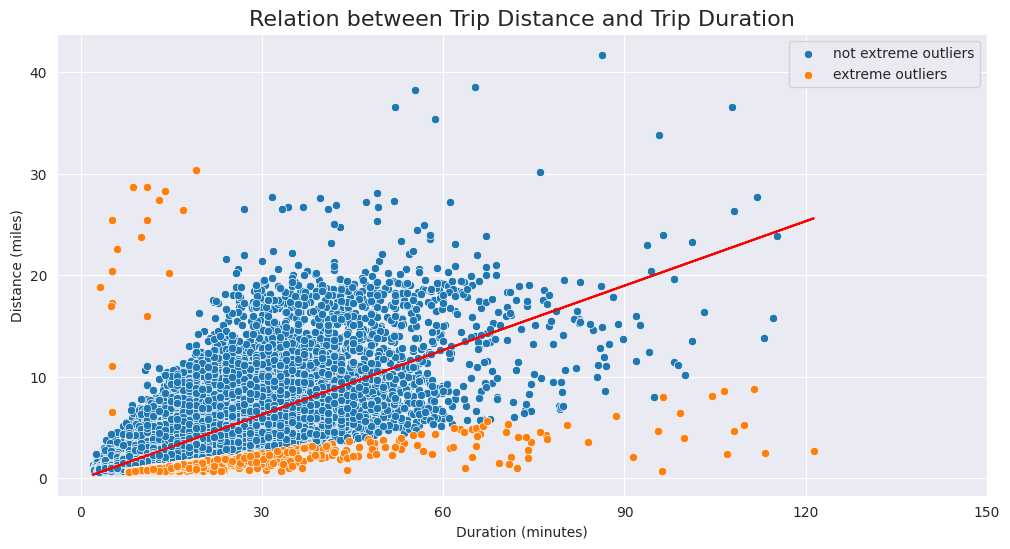

In [ ]:
plt.figure(figsize=(12,6))

sns.scatterplot(df, x='trip_duration', y='trip_distance', color=color[0], label='not extreme outliers')
sns.scatterplot(outliers, x='trip_duration', y='trip_distance', color=color[1], label='extreme outliers')

x, y = df['trip_duration'], df['trip_distance']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 180, 30))
plt.legend(loc ="upper right", prop={'size': 10})
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)
plt.show()

In [ ]:
ct_duration = df.loc[~df.index.isin(outliers.index)].groupby('distance_bins').agg(count=('distance_bins', 'count'), avg_speed=('speed', 'mean'), median_speed=('speed', 'median')).reset_index()
ct_duration

,distance_bins,count,avg_speed,median_speed
0,<2 miles,29169,10.153732,9.71
1,3-5 miles,24532,12.531660,11.43
2,7-10 miles,4572,18.966203,18.07
3,>10 miles,1526,23.597903,22.40


In [ ]:
new_duration = pd.merge(outliers, ct_duration, on='distance_bins', how='left')
new_duration.index = outliers.index
new_duration.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_bins,trip_duration,duration_bins,speed,count,avg_speed,median_speed
207,2023-01-01 03:12:42,2023-01-01 03:21:54,0.72,<2 miles,9.200000,<10 minutes,4.70,29169,10.153732,9.71
545,2023-01-01 12:53:04,2023-01-01 14:10:09,4.26,3-5 miles,77.083333,>30 minutes,3.32,24532,12.531660,11.43
556,2023-01-01 13:07:46,2023-01-01 13:18:48,16.00,>10 miles,11.030000,11-20 minutes,87.04,1526,23.597903,22.40
648,2023-01-01 13:34:51,2023-01-01 13:59:58,1.86,<2 miles,25.116667,21-30 minutes,4.44,29169,10.153732,9.71
769,2023-01-01 15:33:05,2023-01-01 16:03:34,1.15,<2 miles,30.483333,>30 minutes,2.26,29169,10.153732,9.71


ketika fitur speed di ubah maka akan berdampak ke beberapa fitur lainnya seperti durasi perjalanan, bin durasi dan waktu dropoff

In [ ]:
df.loc[outliers.index, 'speed'] = new_duration['median_speed'].round(2)

time_duration = (df['trip_distance'] / df['speed']) * 60
df.loc[outliers.index, 'trip_duration'] = time_duration.round(2)
df.loc[outliers.index, 'duration_bins'] = pd.cut(df['trip_duration'], bins=bins_of_duration, labels=labels_of_duration)

df.loc[outliers.index, 'lpep_dropoff_datetime'] = df['lpep_pickup_datetime'] + pd.to_timedelta((df['trip_duration']), unit='m').dt.round('S')
df.loc[outliers.index][['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'distance_bins', 'trip_duration', 'duration_bins', 'speed']].head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,distance_bins,trip_duration,duration_bins,speed
207,2023-01-01 03:12:42,2023-01-01 03:17:09,0.72,<2 miles,4.45,<10 minutes,9.71
545,2023-01-01 12:53:04,2023-01-01 13:15:26,4.26,3-5 miles,22.36,21-30 minutes,11.43
556,2023-01-01 13:07:46,2023-01-01 13:50:38,16.00,>10 miles,42.86,>30 minutes,22.40
648,2023-01-01 13:34:51,2023-01-01 13:46:20,1.86,<2 miles,11.49,11-20 minutes,9.71
769,2023-01-01 15:33:05,2023-01-01 15:40:12,1.15,<2 miles,7.11,<10 minutes,9.71


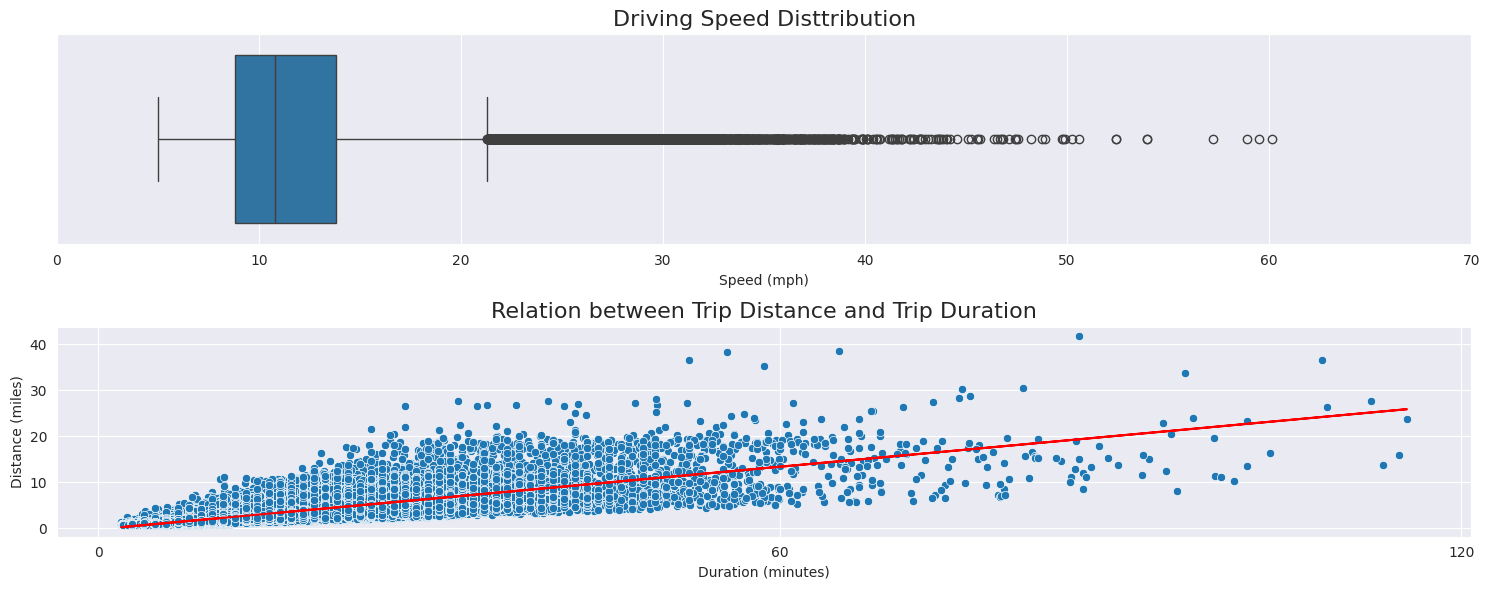

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='speed', color=color[0])
plt.xlabel('Speed (mph)')
plt.xticks(np.arange(0, 71, 10))
plt.title('Driving Speed Disttribution', fontsize=16)

plt.subplot(2, 1, 2)
sns.scatterplot(df, x='trip_duration', y='trip_distance', color=color[0])
plt.xlabel('Duration (minutes)')
plt.ylabel('Distance (miles)')
plt.xticks(np.arange(0, 181, 60))
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)

x, y = df['trip_duration'], df['trip_distance']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')


plt.tight_layout()
plt.show()

In [ ]:
bins_of_speed = [0, 10, 20, 30, np.inf]
labels_of_speed = ['<10 mph', '11-20 mph', '21-30 mph', '>30 mph']
df['speed_bins'] = pd.cut(df['speed'], bins=bins_of_speed, labels=labels_of_speed)

In [ ]:
df['speed_bins'].value_counts()

,count
speed_bins,
11-20 mph,30909
<10 mph,24906
21-30 mph,4162
>30 mph,721


## **Amount**

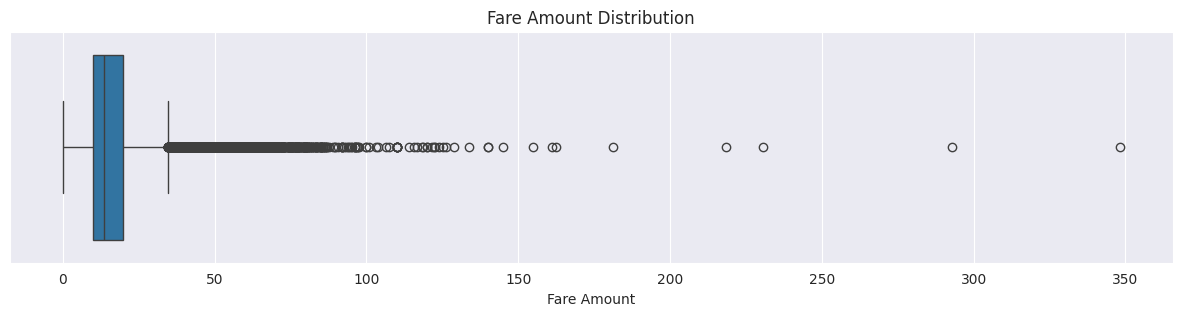

In [ ]:
plt.figure(figsize=(15,3))

sns.set_style("darkgrid")

sns.boxplot(data=df, x='fare_amount', color=color[0])
plt.xlabel('Fare Amount')
plt.title('Fare Amount Distribution')
plt.show()

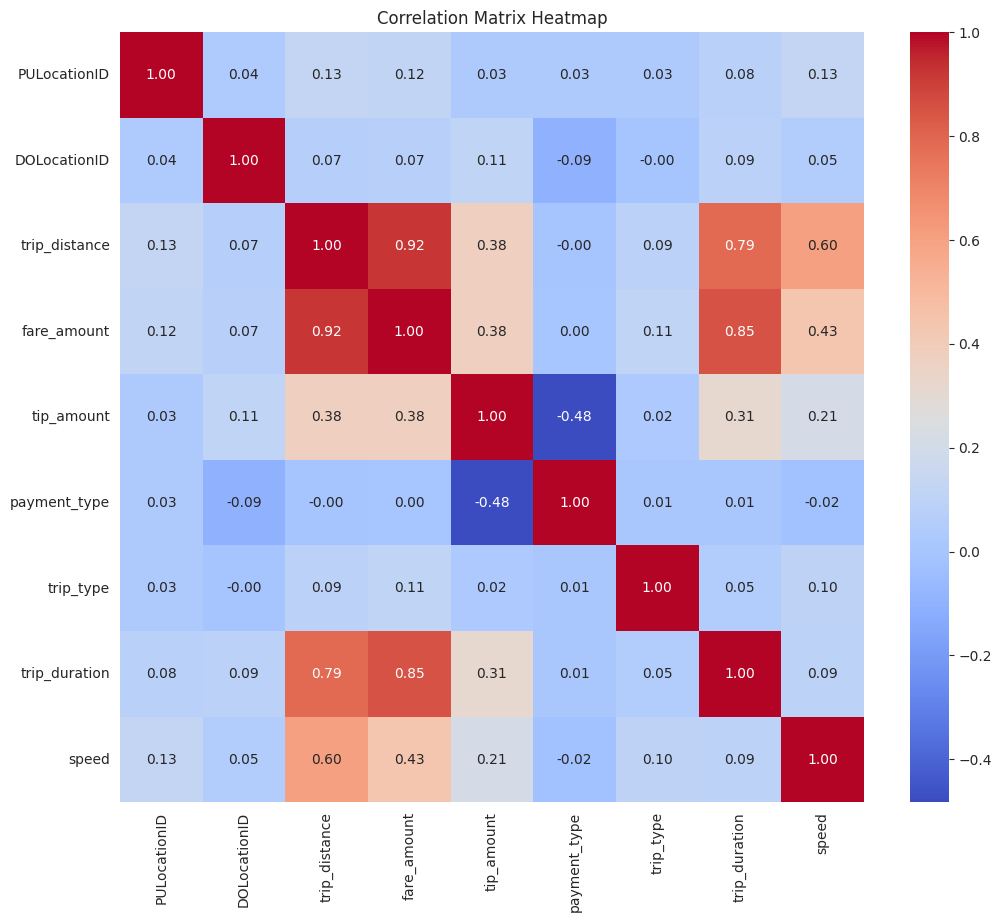

In [ ]:
# Calculate the correlation matrix only for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

- Berdasarkan heatmap korelasi diatas, fare amount memiliki nilai korelasi yang tinggi terhadap trip distance yaitu 0.92. Untuk menangani outliersnya bisa dilihat berdasarkan kontekstual terhadap variabel tersebut

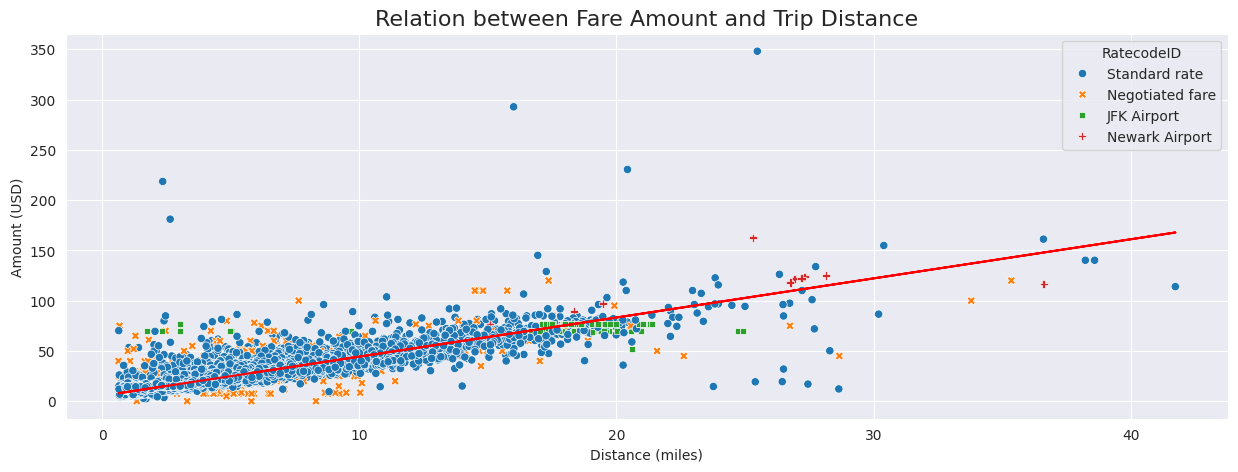

In [ ]:
plt.figure(figsize=(15, 5))

sns.scatterplot(df, x='trip_distance', y='fare_amount',  hue='RatecodeID', style='RatecodeID')
plt.xlabel('Distance (miles)')
plt.ylabel('Amount (USD)')
plt.title('Relation between Fare Amount and Trip Distance', fontsize=16)

x, y = df['trip_distance'], df['fare_amount']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()

Hubungan antara Fare amount dan jarak secara umum memiliki hubungan linear dimana ketika jarak semakin jauh maka fare amount juga semakin tinggi.

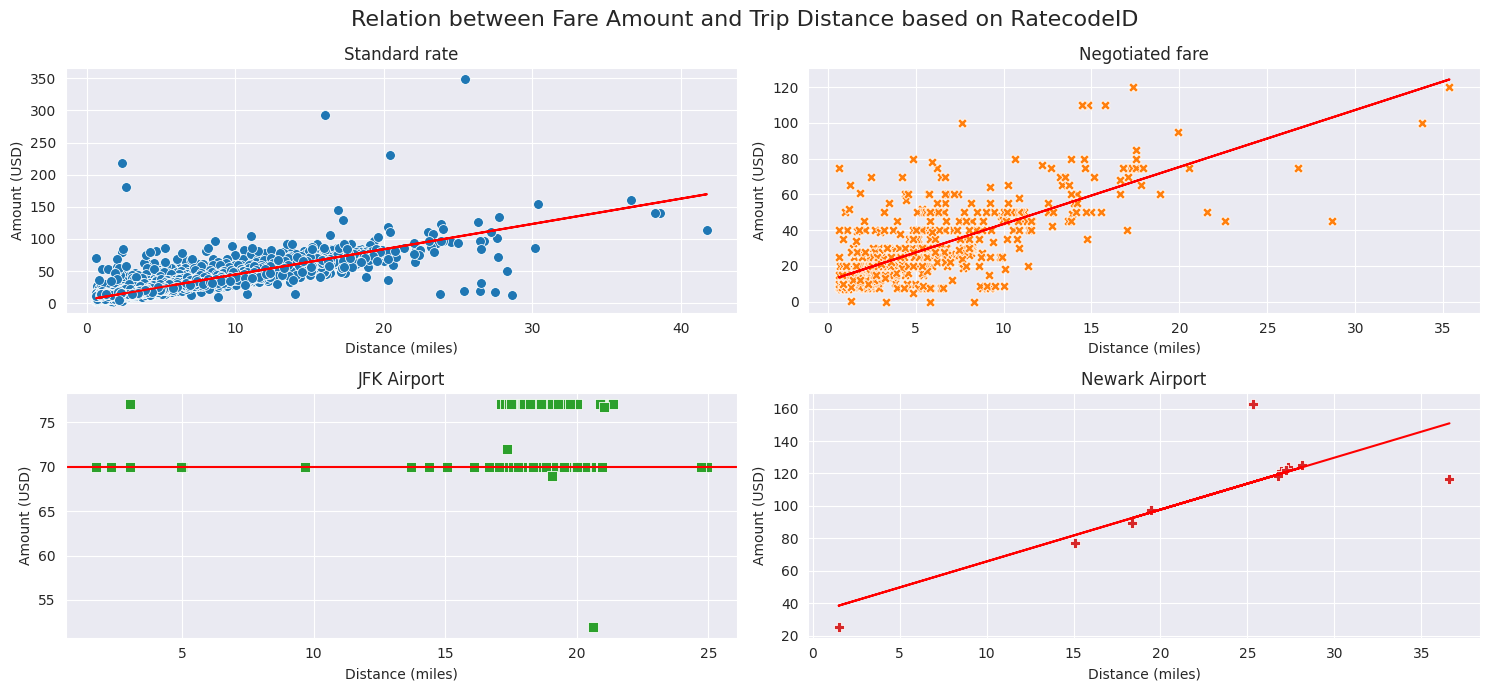

In [ ]:
plt.figure(figsize=(15, 7))
plt.suptitle('Relation between Fare Amount and Trip Distance based on RatecodeID', fontsize=16)

markers=['o','X','s','P']
for i, val in enumerate(df['RatecodeID'].unique()):
    subset = df[df['RatecodeID'] == val]
    x = subset['trip_distance']
    y = subset['fare_amount']

    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x, y=y,  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')
    if val == 'JFK Airport':
        plt.axhline(y=70, color='red')
        continue
    else:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='red')

plt.tight_layout()
plt.show()

**Kategori Tarif "Standard Rate"**

Hubungan antara jarak perjalanan dan jumlah tarif (fare amount) menunjukkan pola linear, di mana semakin jauh jarak perjalanan, semakin tinggi tarif yang dikenakan. Namun, terdapat beberapa titik data yang menyimpang dari pola ini (outliers), yang tidak sesuai dengan garis tren linear.

**Kategori Tarif "Negotiated Fare"**

Pola hubungan antara jarak perjalanan dan tarif tetap linear, tetapi sebaran titik data lebih tidak teratur dibandingkan dengan kategori "Standard Rate". Hal ini wajar karena pada kategori ini tarif dapat dinegosiasikan, sehingga menghasilkan variasi yang lebih besar. Meski demikian, titik-titik yang sangat jauh dari nilai tarif umum tetap dianggap sebagai outliers.

**Kategori Tarif "JFK Airport"**

Tidak terlihat hubungan linear antara jarak perjalanan dan tarif pada kategori ini, karena perjalanan ke atau dari Bandara JFK menggunakan tarif tetap (flat rate) sebesar 70 USD. Beberapa data menunjukkan tarif di bawah 70 USD, yang dianggap sebagai outliers.

**Kategori Tarif "Newark Airport"**

Hubungan linear kembali terlihat antara jarak perjalanan dan tarif untuk perjalanan ke atau dari Bandara Newark. Karena jumlah data pada kategori ini relatif sedikit, outliers yang muncul juga terbatas.

In [ ]:
outliers = pd.DataFrame()

mask_sr_1 = (df['RatecodeID']=='Standard rate') & (df['fare_amount']>120) & (df['trip_distance']<20)
mask_sr_2 = (df['RatecodeID']=='Standard rate') & (df['fare_amount']<60) & (df['trip_distance']>20)
mask_sr_3 = (df['RatecodeID']=='Standard rate') & (df['fare_amount']>150) & (df['trip_distance']<30)
sr_outlier = df[mask_sr_1 | mask_sr_2 | mask_sr_3]
outliers = pd.concat([outliers, sr_outlier], ignore_index=True) # Use pd.concat instead of append

mask_nf_1 = (df['RatecodeID']=='Negotiated fare') & (df['fare_amount']>99) & (df['trip_distance']<20)
mask_nf_2 = (df['RatecodeID']=='Negotiated fare') & (df['fare_amount']<5) & (df['trip_distance']<10)
mask_nf_3 = (df['RatecodeID']=='Negotiated fare') & (df['fare_amount']<60) & (df['trip_distance']>20)
mask_nf_4 = (df['RatecodeID']=='Negotiated fare') & (df['fare_amount']>60) & (df['trip_distance']<10)
nf_outlier = df[mask_nf_1 | mask_nf_2 | mask_nf_3 | mask_nf_4]
outliers = pd.concat([outliers, nf_outlier], ignore_index=True) # Use pd.concat instead of append

mask_jfk = (df['RatecodeID']=='JFK Airport') & (df['fare_amount']<70)
jfk_outlier = df[mask_jfk]
outliers = pd.concat([outliers, jfk_outlier], ignore_index=True) # Use pd.concat instead of append

mask_ewr = (df['RatecodeID']=='Newark Airport') & (df['fare_amount']>160)
ewr_outlier = df[mask_ewr]
outliers = pd.concat([outliers, ewr_outlier], ignore_index=True) # Use pd.concat instead of append

print('Total standard rate outlier:',len(sr_outlier))
print('Total negotiated rate outlier:',len(nf_outlier))
print('Total JFK airport outlier:',len(jfk_outlier))
print('Total Newark airport outlier:',len(ewr_outlier))
print('Total seluruh outlier:',len(outliers))

outliers = outliers[['RatecodeID', 'distance_bins', 'fare_amount']]

outliers.head()

Total standard rate outlier: 16
Total negotiated rate outlier: 24
Total JFK airport outlier: 2
Total Newark airport outlier: 1
Total seluruh outlier: 43


,RatecodeID,distance_bins,fare_amount
0,Standard rate,>10 miles,292.8
1,Standard rate,3-5 miles,218.6
2,Standard rate,>10 miles,348.1
3,Standard rate,>10 miles,59.0
4,Standard rate,>10 miles,230.5


Ubah nilai outlier tersebut dengan nilai central tendency (median) fare amount berdasarkan ratecodeID dan distance_bins pada dataset yang bukan outlier

In [ ]:
ct_amount = df[~df.index.isin(outliers.index)].groupby(['RatecodeID', 'distance_bins']).agg(count=('fare_amount', 'count'), avg_fare=('fare_amount', 'mean'), median_fare=('fare_amount', 'median')).reset_index()
ct_amount.head()

,RatecodeID,distance_bins,count,avg_fare,median_fare
0,JFK Airport,<2 miles,1,70.000000,70.0
1,JFK Airport,3-5 miles,6,71.166667,70.0
2,JFK Airport,7-10 miles,1,70.000000,70.0
3,JFK Airport,>10 miles,144,71.727361,70.0
4,Negotiated fare,<2 miles,148,16.005676,12.0


In [ ]:
new_fare = pd.merge(outliers, ct_amount, on=['RatecodeID', 'distance_bins'], how='left')
new_fare.drop(columns='count', inplace=True)
new_fare.index = outliers.index
display(new_fare.sample(5))

,RatecodeID,distance_bins,fare_amount,avg_fare,median_fare
3,Standard rate,>10 miles,59.0,56.177322,52.17
17,Negotiated fare,3-5 miles,80.0,22.755884,20.00
1,Standard rate,3-5 miles,218.6,19.028571,17.70
9,Standard rate,>10 miles,19.3,56.177322,52.17
22,Negotiated fare,<2 miles,75.0,16.005676,12.00


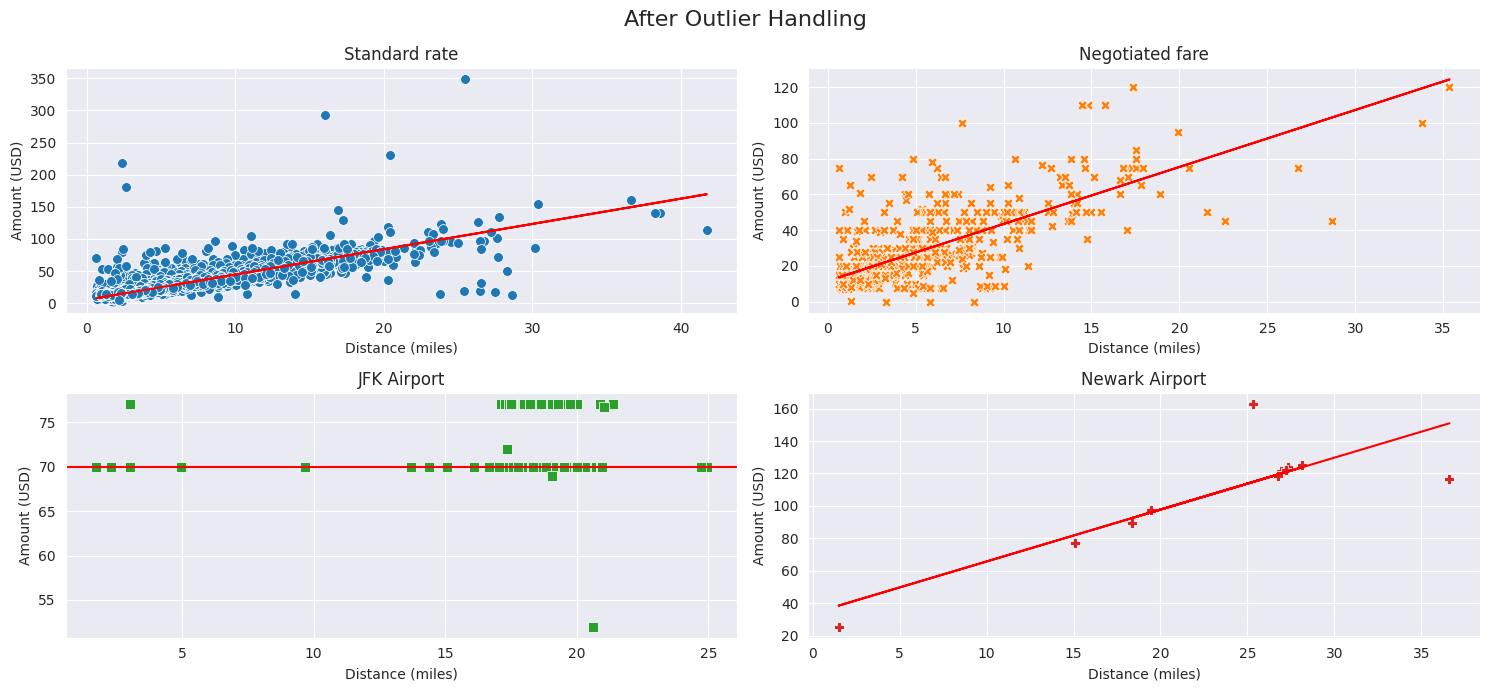

In [ ]:
plt.figure(figsize=(15, 7))
plt.suptitle('After Outlier Handling', fontsize=16)

markers=['o','X','s','P']
for i, val in enumerate(df['RatecodeID'].unique()):
    subset = df[df['RatecodeID'] == val]
    x = subset['trip_distance']
    y = subset['fare_amount']

    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x, y=y,  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')
    if val == 'JFK Airport':
        plt.axhline(y=70, color='red')
        continue
    else:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='red')

plt.tight_layout()
plt.show()

Untuk mengatasi normal outliers handle dengan bins

In [ ]:
bins_fare = [0, 20, 40, 60, np.inf]
labels_fare = ['<20$', '21-40$', '41-60$', '>60$']
df['fare_amount_bins'] = pd.cut(df['fare_amount'], bins=bins_fare, labels=labels_fare)

In [ ]:
df['fare_amount_bins'].value_counts()

,count
fare_amount_bins,
<20$,45975
21-40$,12270
41-60$,1830
>60$,623


## **Tip Amount**

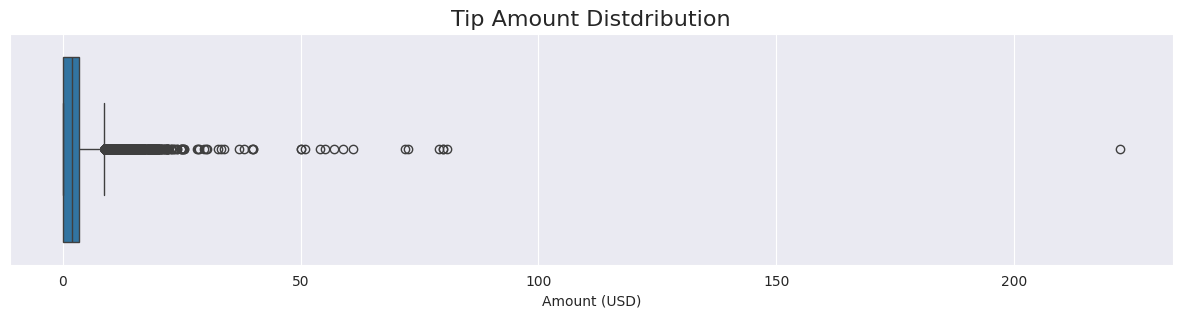

In [ ]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='tip_amount', palette=color)
plt.xlabel('Amount (USD)')
plt.title('Tip Amount Distdribution', fontsize=16)

plt.show()

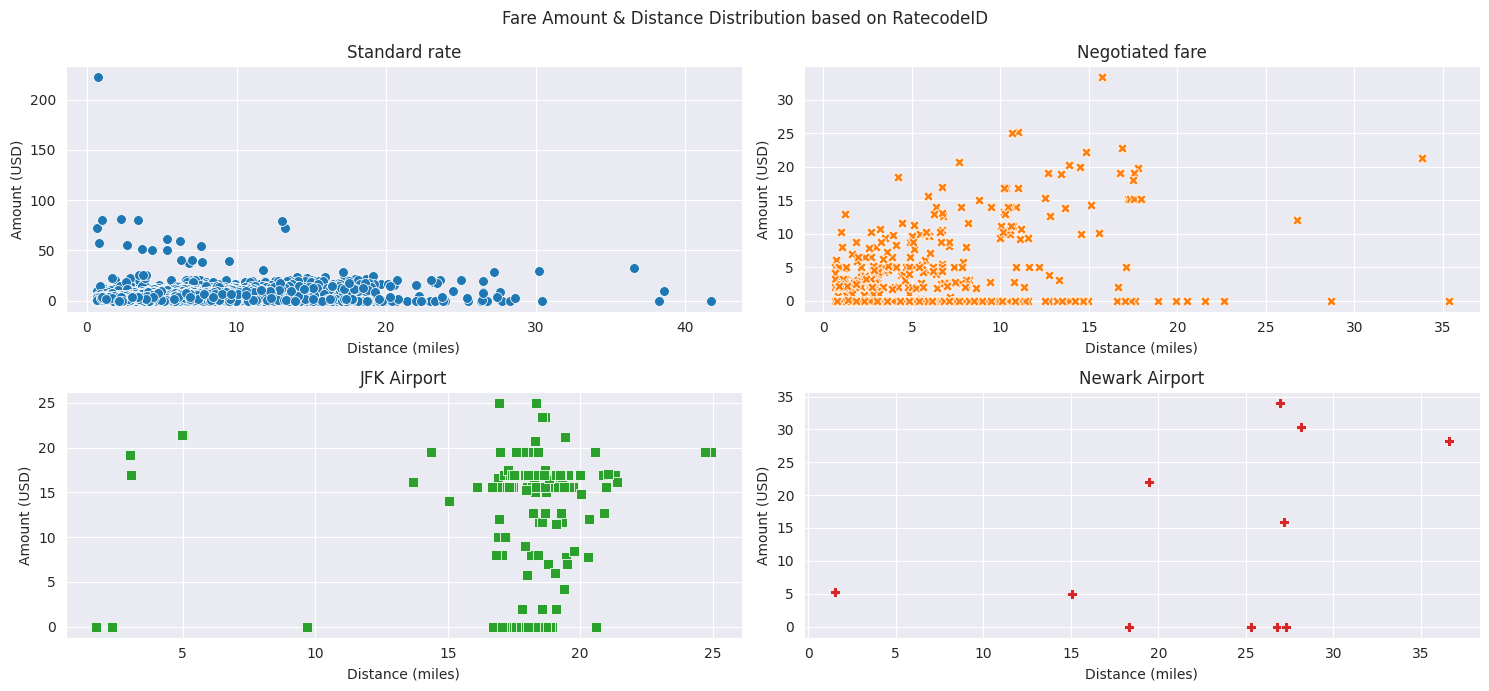

In [ ]:
plt.figure(figsize=(15, 7))
plt.suptitle('Fare Amount & Distance Distribution based on RatecodeID')
markers=['o','X','s','P']
for i, val in enumerate(df['RatecodeID'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( df[df['RatecodeID'] == val], x='trip_distance', y='tip_amount',  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

- Tidak terdapat hubungan yang jelas antara jarak perjalanan dan tip amount pada semua kategori tarif.

- Pada kategori Standard Rate, rentang tip amount berada antara 0 hingga lebih dari 200 USD. Namun, nilai di atas 200 USD hanya muncul sekali, dan nilai lebih dari 50 USD sebagian besar terjadi pada perjalanan dengan jarak kurang dari 20 mil. Titik-titik ini dianggap sebagai data yang tidak wajar (extreme outlier). Oleh karena itu, rentang normal tip amount untuk kategori ini adalah 0–50 USD.

- Pada kategori Negotiated Fare, rentang tip amount terlihat berkisar antara 0 hingga 35 USD.

- Pada kategori JFK Airport, rentang tip amount berada antara 0 hingga 25 USD.

- Pada kategori Newark Airport, rentang tip amount berkisar dari 0 hingga 35 USD.

- Berdasarkan visualisasi, extreme outlier terlihat pada nilai tip amount yang lebih besar dari 50 USD, terlepas dari kategori tarif.



In [ ]:
outliers = df[df['tip_amount']>50][['RatecodeID', 'distance_bins', 'fare_amount_bins', 'tip_amount']]
outliers

,RatecodeID,distance_bins,fare_amount_bins,tip_amount
297,Standard rate,7-10 miles,21-40$,54.00
16464,Standard rate,3-5 miles,21-40$,80.00
19464,Standard rate,>10 miles,41-60$,72.00
20685,Standard rate,<2 miles,<20$,72.55
24979,Standard rate,3-5 miles,21-40$,61.00
31679,Standard rate,>10 miles,41-60$,79.00
32984,Standard rate,3-5 miles,21-40$,51.00
38664,Standard rate,3-5 miles,<20$,80.88
40892,Standard rate,<2 miles,<20$,80.00
44718,Standard rate,3-5 miles,<20$,55.05


In [ ]:
ct_amount = df[~df.index.isin(outliers.index)].groupby(['RatecodeID', 'distance_bins', 'fare_amount_bins']).agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).reset_index()
ct_amount.head()

,RatecodeID,distance_bins,fare_amount_bins,count,avg_tip,median_tip
0,JFK Airport,<2 miles,<20$,0,NaN,NaN
1,JFK Airport,<2 miles,21-40$,0,NaN,NaN
2,JFK Airport,<2 miles,41-60$,0,NaN,NaN
3,JFK Airport,<2 miles,>60$,1,0.0,0.0
4,JFK Airport,3-5 miles,<20$,0,NaN,NaN


In [ ]:
new_tip = pd.merge(outliers, ct_amount, on=['RatecodeID', 'distance_bins', 'fare_amount_bins'], how='left')
new_tip.drop(columns='count', inplace=True)
new_tip.index = outliers.index
display(new_tip.sample(5))

df.loc[outliers.index, 'tip_amount'] = new_tip['median_tip']
display(df.loc[outliers.index][['RatecodeID', 'distance_bins', 'fare_amount', 'tip_amount']])

,RatecodeID,distance_bins,fare_amount_bins,tip_amount,avg_tip,median_tip
16464,Standard rate,3-5 miles,21-40$,80.00,3.168055,3.0
56276,Standard rate,7-10 miles,21-40$,58.88,4.313015,5.0
24979,Standard rate,3-5 miles,21-40$,61.00,3.168055,3.0
20685,Standard rate,<2 miles,<20$,72.55,1.446475,1.5
19464,Standard rate,>10 miles,41-60$,72.00,5.553547,5.0


,RatecodeID,distance_bins,fare_amount,tip_amount
297,Standard rate,7-10 miles,33.8,5.00
16464,Standard rate,3-5 miles,26.1,3.00
19464,Standard rate,>10 miles,56.2,5.00
20685,Standard rate,<2 miles,8.6,1.50
24979,Standard rate,3-5 miles,26.8,3.00
31679,Standard rate,>10 miles,49.2,5.00
32984,Standard rate,3-5 miles,25.4,3.00
38664,Standard rate,3-5 miles,14.2,2.56
40892,Standard rate,<2 miles,7.2,1.50
44718,Standard rate,3-5 miles,17.7,2.56


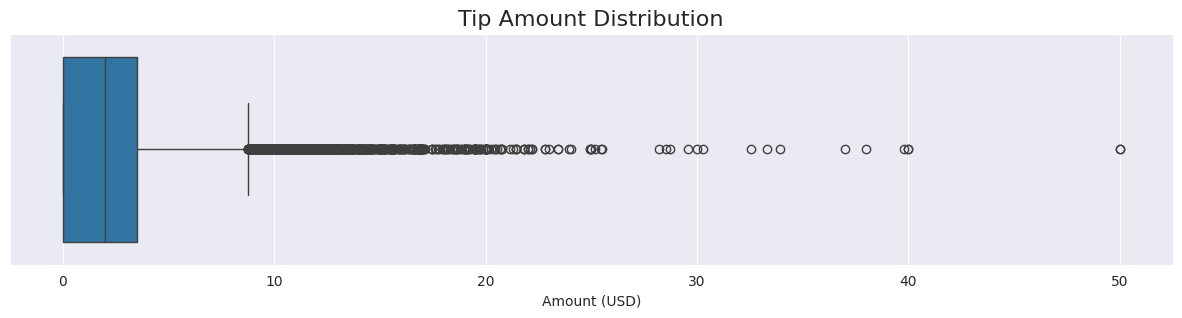

In [ ]:
plt.figure(figsize=(15, 3))

sns.boxplot(data=df, x='tip_amount', color=color[0])
plt.xlabel('Amount (USD)')
plt.title('Tip Amount Distribution', fontsize=16)

plt.show()

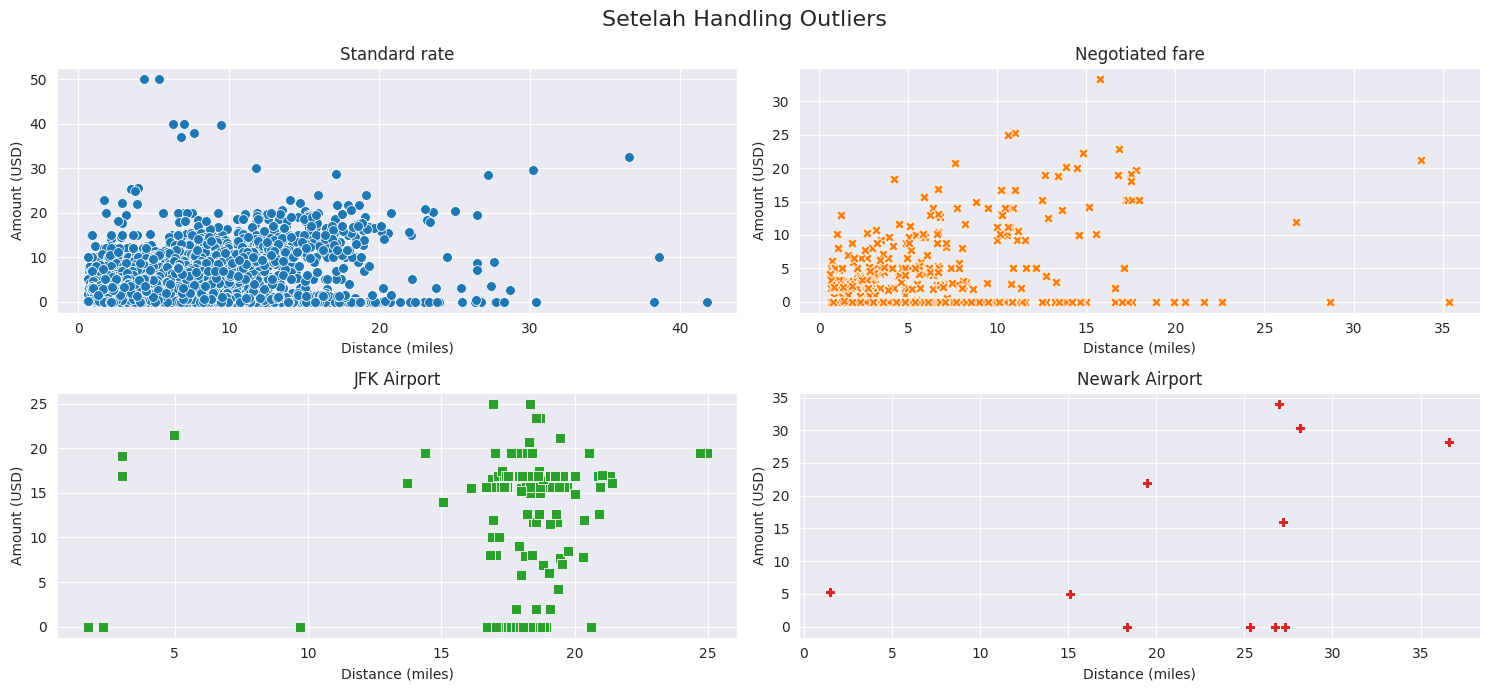

In [ ]:
plt.figure(figsize=(15, 7))
plt.suptitle('Setelah Handling Outliers', fontsize=16)

markers=['o','X','s','P']

for i, val in enumerate(df['RatecodeID'].unique()):
    plt.subplot(2,2,i+1)
    sns.scatterplot( df[df['RatecodeID'] == val], x='trip_distance', y='tip_amount',  color=color[i], marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

normal outliers handle dengan bins

In [ ]:
bins_tip = [-np.inf, 0, 5, 10, 15, np.inf]
labels_tip = ['0$', '1-5$', '6-10$', '11-15$', '>15$']
df['tip_amount_bins'] = pd.cut(df['tip_amount'], bins=bins_tip, labels=labels_tip)

In [ ]:
df['tip_amount_bins'].value_counts()

,count
tip_amount_bins,
1-5$,29821
0$,23683
6-10$,6191
11-15$,744
>15$,259


## **Payment Types**

In [ ]:
df['payment_type']=df['payment_type'].replace({1:'Credit card', 2:'Cash', 3:'No charge', 4:'Dispute', 5:'Unknown', 6:'Voided trip'})
df['payment_type'].value_counts()

,count
payment_type,
Credit card,40261
Cash,19885
Unknown,435
No charge,98
Dispute,19


## **Trip Type**

In [ ]:
df['trip_type']=df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
df['trip_type'].value_counts()

,count
trip_type,
Street-hail,60150
Dispatch,548


## **Setting Column Index**

In [ ]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,pickup_time,day_category,distance_bins,trip_duration,duration_bins,speed,speed_bins,fare_amount_bins,tip_amount_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard rate,166,143,1.0,2.58,14.9,4.03,Credit card,Street-hail,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,Midnight,Weekend,3-5 miles,11.016667,11-20 minutes,14.05,11-20 mph,<20$,1-5$
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard rate,24,43,1.0,1.81,10.7,2.64,Credit card,Street-hail,Manhattan,Bloomingdale,Manhattan,Central Park,Midnight,Weekend,<2 miles,6.766667,<10 minutes,16.05,11-20 mph,<20$,1-5$
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard rate,41,238,1.0,1.30,6.5,1.70,Credit card,Street-hail,Manhattan,Central Harlem,Manhattan,Upper West Side North,Midnight,Weekend,<2 miles,5.816667,<10 minutes,13.41,11-20 mph,<20$,1-5$
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard rate,41,74,1.0,1.10,6.0,0.00,Credit card,Street-hail,Manhattan,Central Harlem,Manhattan,East Harlem North,Midnight,Weekend,<2 miles,5.966667,<10 minutes,11.06,11-20 mph,<20$,0$
5,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard rate,41,262,1.0,2.78,17.7,0.00,Cash,Street-hail,Manhattan,Central Harlem,Manhattan,Yorkville East,Midnight,Weekend,3-5 miles,17.550000,11-20 minutes,9.50,<10 mph,<20$,0$


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60698 entries, 0 to 68210
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   60698 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  60698 non-null  datetime64[ns]
 2   day_category           60698 non-null  object        
 3   pickup_time            60698 non-null  category      
 4   RatecodeID             60698 non-null  object        
 5   PULocationID           60698 non-null  int64         
 6   PUBorough              60698 non-null  object        
 7   PUZone                 60698 non-null  object        
 8   DOLocationID           60698 non-null  int64         
 9   DOBorough              60698 non-null  object        
 10  DOZone                 60698 non-null  object        
 11  passenger_count        60698 non-null  object        
 12  trip_distance          60698 non-null  float64       
 13  distan

In [ ]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount', 'payment_type', 'trip_type', 'PUBorough',
       'PUZone', 'DOBorough', 'DOZone', 'pickup_time', 'day_category',
       'distance_bins', 'trip_duration', 'duration_bins', 'speed',
       'speed_bins', 'fare_amount_bins', 'tip_amount_bins'],
      dtype='object')

In [ ]:
df = df[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'day_category', 'pickup_time', 'RatecodeID', 'PULocationID','PUBorough', 'PUZone', 'DOLocationID', 'DOBorough', 'DOZone', 'passenger_count', 'trip_distance', 'distance_bins', 'fare_amount', 'fare_amount_bins', 'tip_amount', 'tip_amount_bins', 'payment_type', 'trip_type', 'trip_duration', 'duration_bins', 'speed', 'speed_bins']]
df

,lpep_pickup_datetime,lpep_dropoff_datetime,day_category,pickup_time,RatecodeID,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,DOZone,passenger_count,trip_distance,distance_bins,fare_amount,fare_amount_bins,tip_amount,tip_amount_bins,payment_type,trip_type,trip_duration,duration_bins,speed,speed_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Weekend,Midnight,Standard rate,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West,1.0,2.58,3-5 miles,14.90,<20$,4.03,1-5$,Credit card,Street-hail,11.016667,11-20 minutes,14.05,11-20 mph
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Weekend,Midnight,Standard rate,24,Manhattan,Bloomingdale,43,Manhattan,Central Park,1.0,1.81,<2 miles,10.70,<20$,2.64,1-5$,Credit card,Street-hail,6.766667,<10 minutes,16.05,11-20 mph
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North,1.0,1.30,<2 miles,6.50,<20$,1.70,1-5$,Credit card,Street-hail,5.816667,<10 minutes,13.41,11-20 mph
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North,1.0,1.10,<2 miles,6.00,<20$,0.00,0$,Credit card,Street-hail,5.966667,<10 minutes,11.06,11-20 mph
5,2023-01-01 00:53:31,2023-01-01 01:11:04,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,262,Manhattan,Yorkville East,1.0,2.78,3-5 miles,17.70,<20$,0.00,0$,Cash,Street-hail,17.550000,11-20 minutes,9.50,<10 mph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,Weekdays,Night,Standard rate,49,Brooklyn,Clinton Hill,62,Brooklyn,Crown Heights South,1.0,2.31,3-5 miles,15.70,<20$,0.00,0$,Unknown,Street-hail,13.000000,11-20 minutes,10.66,11-20 mph
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,Weekdays,Night,Standard rate,10,Queens,Baisley Park,205,Queens,Saint Albans,1.0,2.14,3-5 miles,4.41,<20$,0.00,0$,Unknown,Street-hail,8.000000,<10 minutes,16.05,11-20 mph
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,Weekdays,Night,Standard rate,66,Brooklyn,DUMBO/Vinegar Hill,37,Brooklyn,Bushwick South,1.0,3.44,3-5 miles,16.53,<20$,3.51,1-5$,Credit card,Street-hail,16.000000,11-20 minutes,12.90,11-20 mph
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,Weekdays,Night,Standard rate,225,Brooklyn,Stuyvesant Heights,189,Brooklyn,Prospect Heights,1.0,3.03,3-5 miles,14.98,<20$,3.20,1-5$,Credit card,Street-hail,18.000000,11-20 minutes,10.10,11-20 mph


<Axes: >

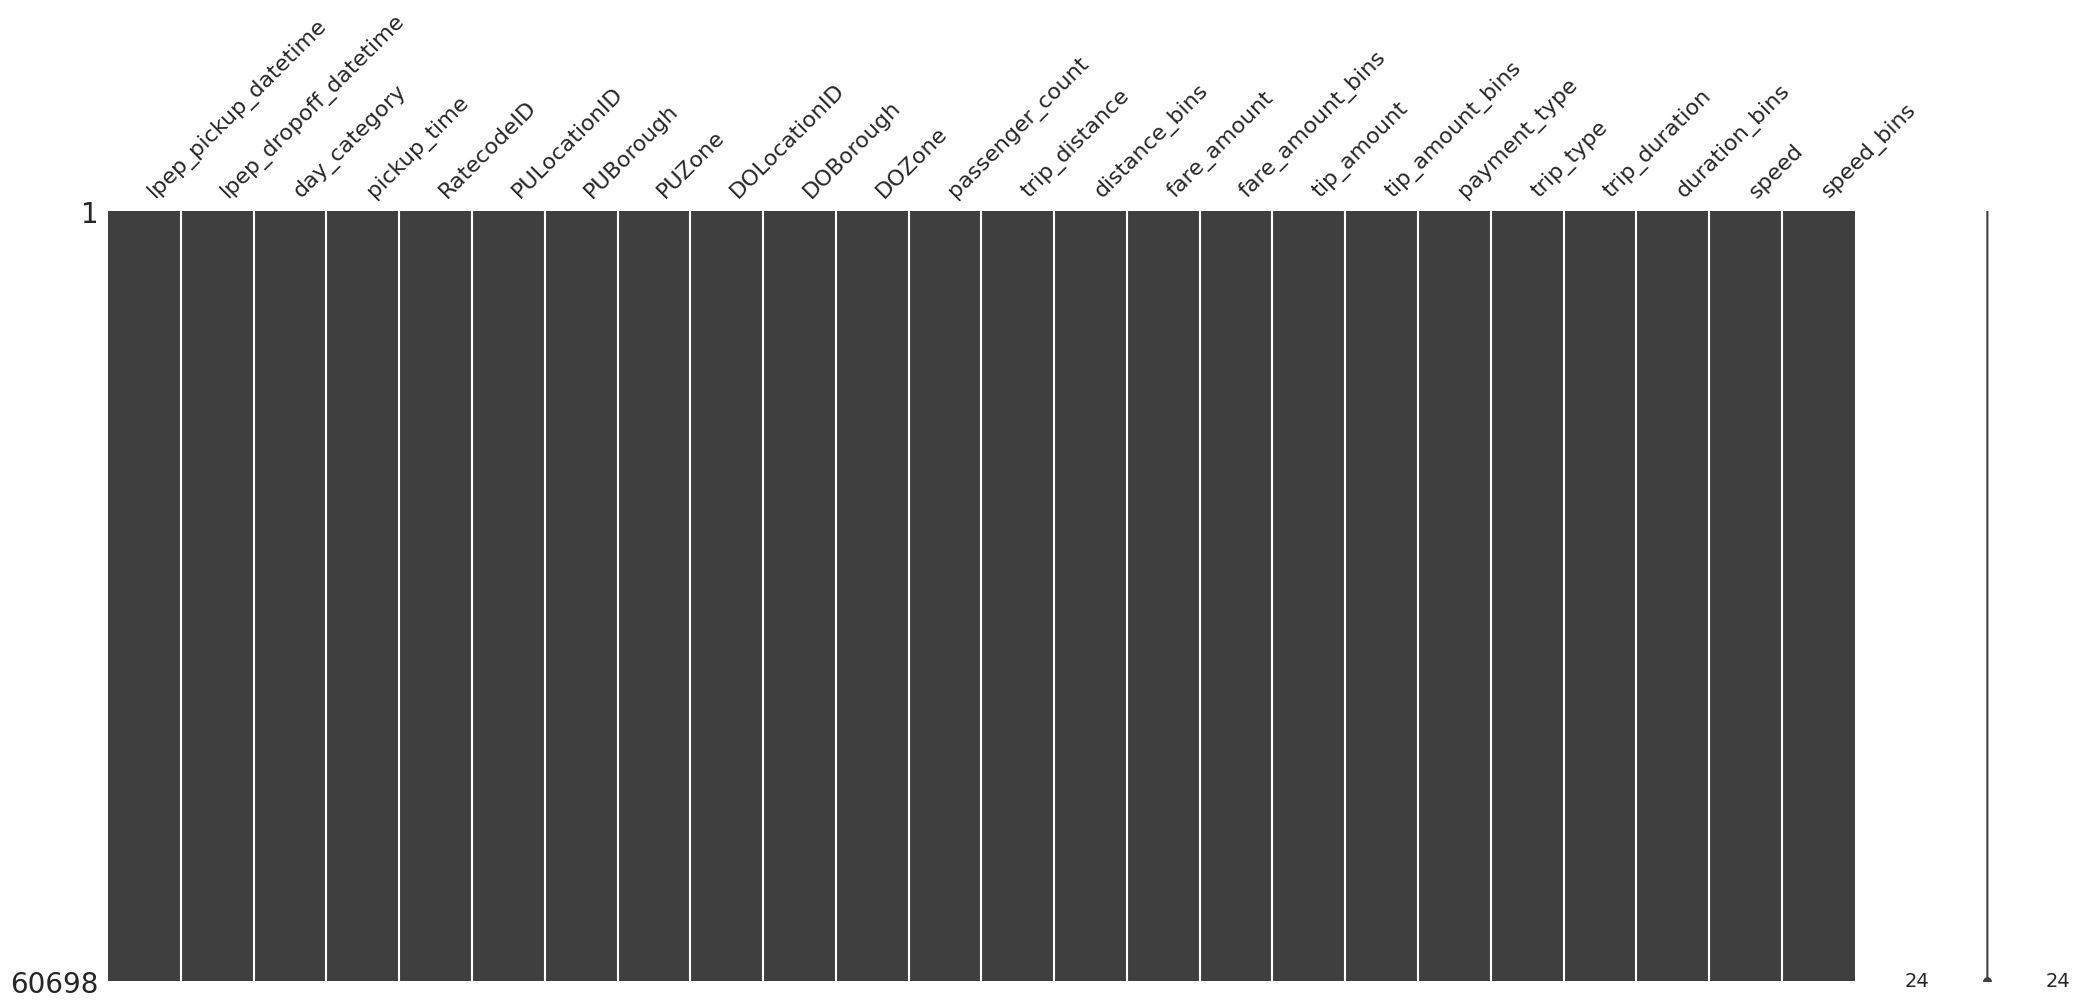

In [ ]:
msno.matrix(df)